データ概要

In [1]:
import pandas as pd

# ファイルパス
train_file_path = 'dataset_ica_ml_train.csv'
test_file_path = 'dataset_ica_ml_test.csv'

# データの読み込み
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# データ概要
print("Train Data Information:")
train_data.info()

print("\nTest Data Information:")
test_data.info()

# データの先頭5行を表示
print("\nTrain Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

# 各カラムの欠損値を確認
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# 統計情報の表示
print("\nStatistical Summary of Train Data:")
print(train_data.describe())

print("\nStatistical Summary of Test Data:")
print(test_data.describe())

Train Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  expenditure_1    10000 non-null  int64  
 12  expenditure_2    10000 non-null  int64  
 13  expenditure_3    10000 non-null  int64  
 14  expenditure_4    10000 non-null  int64  
 15  expenditure_5    10000 non-null  int64  
 16  expenditure_6    10000 non-null  in

# ユニーク値の偏り

In [22]:
# Trainデータのユニーク値
unique_values = train_data.nunique()
print(unique_values)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
expenditure_1         2
expenditure_2         2
expenditure_3         2
expenditure_4         2
expenditure_5         2
expenditure_6         2
expenditure_7         2
expenditure_8         2
expenditure_9         2
expenditure_10        2
event_1               2
event_2               2
event_3               2
event_4               2
event_5               2
event_6               2
event_7               2
event_8               2
event_9               2
event_10              2
year                  1
dtype: int64


In [23]:
# testデータのユニーク値
unique_values = test_data.nunique()
print(unique_values)

CreditScore         474
Geography             3
Gender                2
Age                  71
Tenure               12
Balance            6579
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
expenditure_1       200
expenditure_2       200
expenditure_3       400
expenditure_4       400
expenditure_5       398
expenditure_6       395
expenditure_7       200
expenditure_8       378
expenditure_9       244
expenditure_10      109
event_1               2
event_2               2
event_3               2
event_4               2
event_5               2
event_6               2
event_7               2
event_8               2
event_9               2
event_10              2
year                  1
dtype: int64


In [66]:
train_data["expenditure_1"]

,expenditure_1
0,1000
1,1000
2,0
3,1000
4,1000
...,...
9995,1000
9996,0
9997,1000
9998,0


In [65]:
test_data["expenditure_1"]

,expenditure_1
0,956
1,1013
2,0
3,991
4,968
...,...
9995,974
9996,1
9997,1034
9998,0


trainデータの商品の利用料の数値0の意味は？？

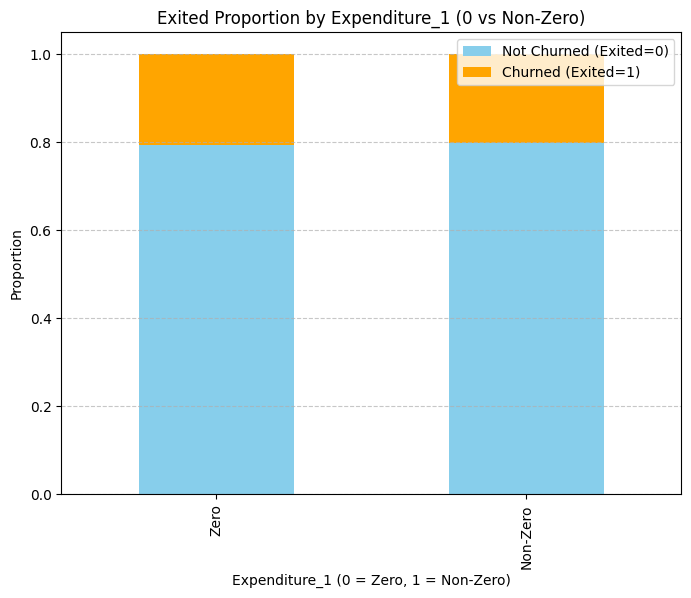

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# expenditure_1 が 0 と 0以外で `Exited` の割合を比較
train_data['expenditure_1_zero'] = (train_data['expenditure_1'] == 0).astype(int)
exited_by_expenditure = train_data.groupby('expenditure_1_zero')['Exited'].value_counts(normalize=True).unstack()

# 棒グラフで可視化
exited_by_expenditure.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 6))
plt.title("Exited Proportion by Expenditure_1 (0 vs Non-Zero)")
plt.xlabel("Expenditure_1 (0 = Zero, 1 = Non-Zero)")
plt.ylabel("Proportion")
plt.xticks([0, 1], ['Zero', 'Non-Zero'])
plt.legend(["Not Churned (Exited=0)", "Churned (Exited=1)"], loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
# テストデータのBalance列で値が-100の個数をカウント
negative_balance_count = test_data[test_data['Balance'] == -100].shape[0]

# 結果を表示
print(negative_balance_count)

0


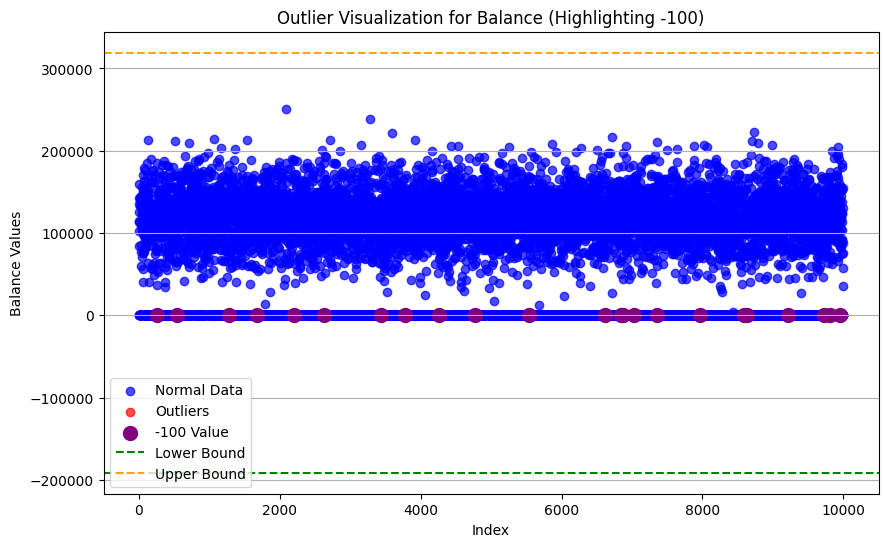

In [16]:

plt.figure(figsize=(10, 6))

# 正常データ（青）と外れ値（赤）をプロット
plt.scatter(non_outliers.index, non_outliers['Balance'], label="Normal Data", color='blue', alpha=0.7)
plt.scatter(outliers.index, outliers['Balance'], label="Outliers", color='red', alpha=0.7)

# 異常値の中に特に注目する -100 をプロット
negative_outlier = test_data[test_data['Balance'] == -100]
plt.scatter(negative_outlier.index, negative_outlier['Balance'], label="-100 Value", color='purple', s=100)

# 上下限の境界線を描画
plt.axhline(y=lower_bound, color='green', linestyle='--', label="Lower Bound")
plt.axhline(y=upper_bound, color='orange', linestyle='--', label="Upper Bound")

# グラフの設定
plt.title("Outlier Visualization for Balance (Highlighting -100)")
plt.xlabel("Index")
plt.ylabel("Balance Values")
plt.legend()
plt.grid(axis='y')
plt.show()


In [20]:
# trainデータのBalance列で値が-100の個数を念の為カウント
negative_balance_count = train_data[train_data['Balance'] == -100].shape[0]

# 結果を表示
print(negative_balance_count)

0


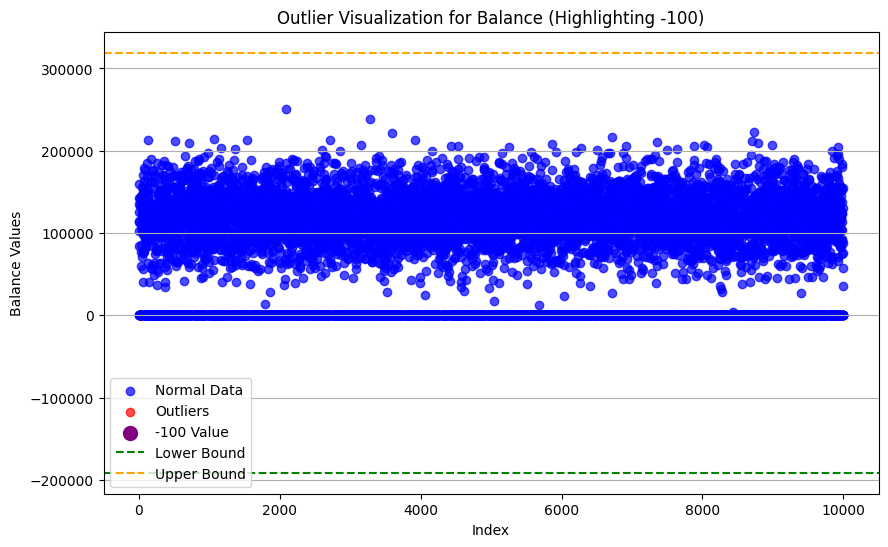

In [21]:

plt.figure(figsize=(10, 6))

# 正常データ（青）と外れ値（赤）をプロット
plt.scatter(non_outliers.index, non_outliers['Balance'], label="Normal Data", color='blue', alpha=0.7)
plt.scatter(outliers.index, outliers['Balance'], label="Outliers", color='red', alpha=0.7)

# 異常値の中に特に注目する -100 をプロット
negative_outlier = train_data[train_data['Balance'] == -100]
plt.scatter(negative_outlier.index, negative_outlier['Balance'], label="-100 Value", color='purple', s=100)

# 上下限の境界線を描画
plt.axhline(y=lower_bound, color='green', linestyle='--', label="Lower Bound")
plt.axhline(y=upper_bound, color='orange', linestyle='--', label="Upper Bound")

# グラフの設定
plt.title("Outlier Visualization for Balance (Highlighting -100)")
plt.xlabel("Index")
plt.ylabel("Balance Values")
plt.legend()
plt.grid(axis='y')
plt.show()


# 解約の割合

<ipython-input-64-a766d5a6ce11>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exited_counts.index, y=exited_counts.values, palette='viridis')


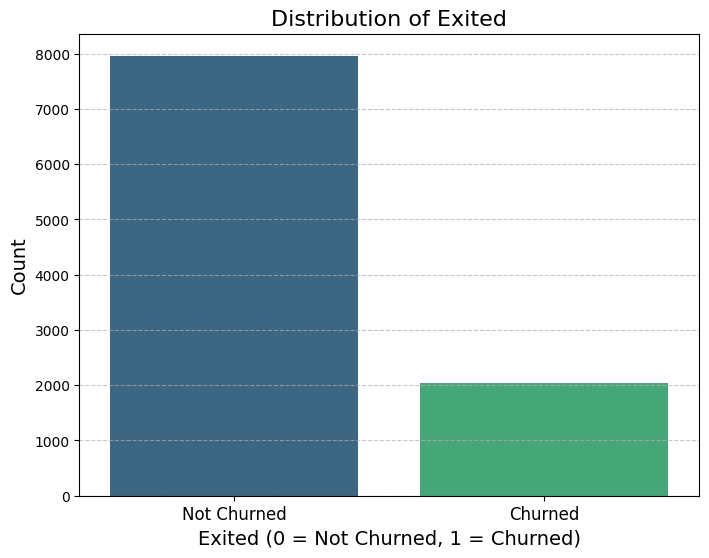

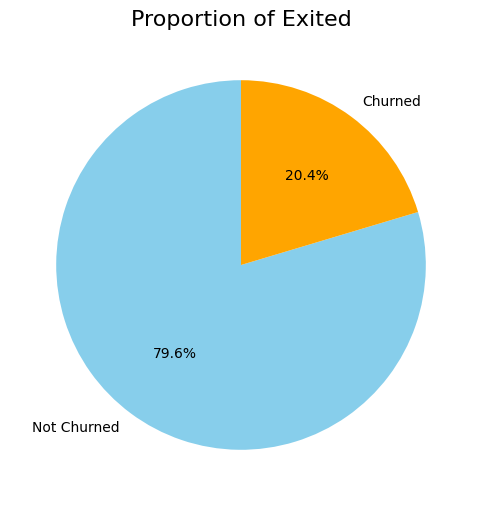

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# `Exited` の分布を確認
exited_counts = train_data['Exited'].value_counts()

# 棒グラフで可視化
plt.figure(figsize=(8, 6))
sns.barplot(x=exited_counts.index, y=exited_counts.values, palette='viridis')
plt.title("Distribution of Exited", fontsize=16)
plt.xlabel("Exited (0 = Not Churned, 1 = Churned)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ['Not Churned', 'Churned'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 円グラフで可視化
plt.figure(figsize=(8, 6))
plt.pie(exited_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Proportion of Exited", fontsize=16)
plt.show()

# 数値変数の分布 (ヒストグラム & 箱ひげ図)

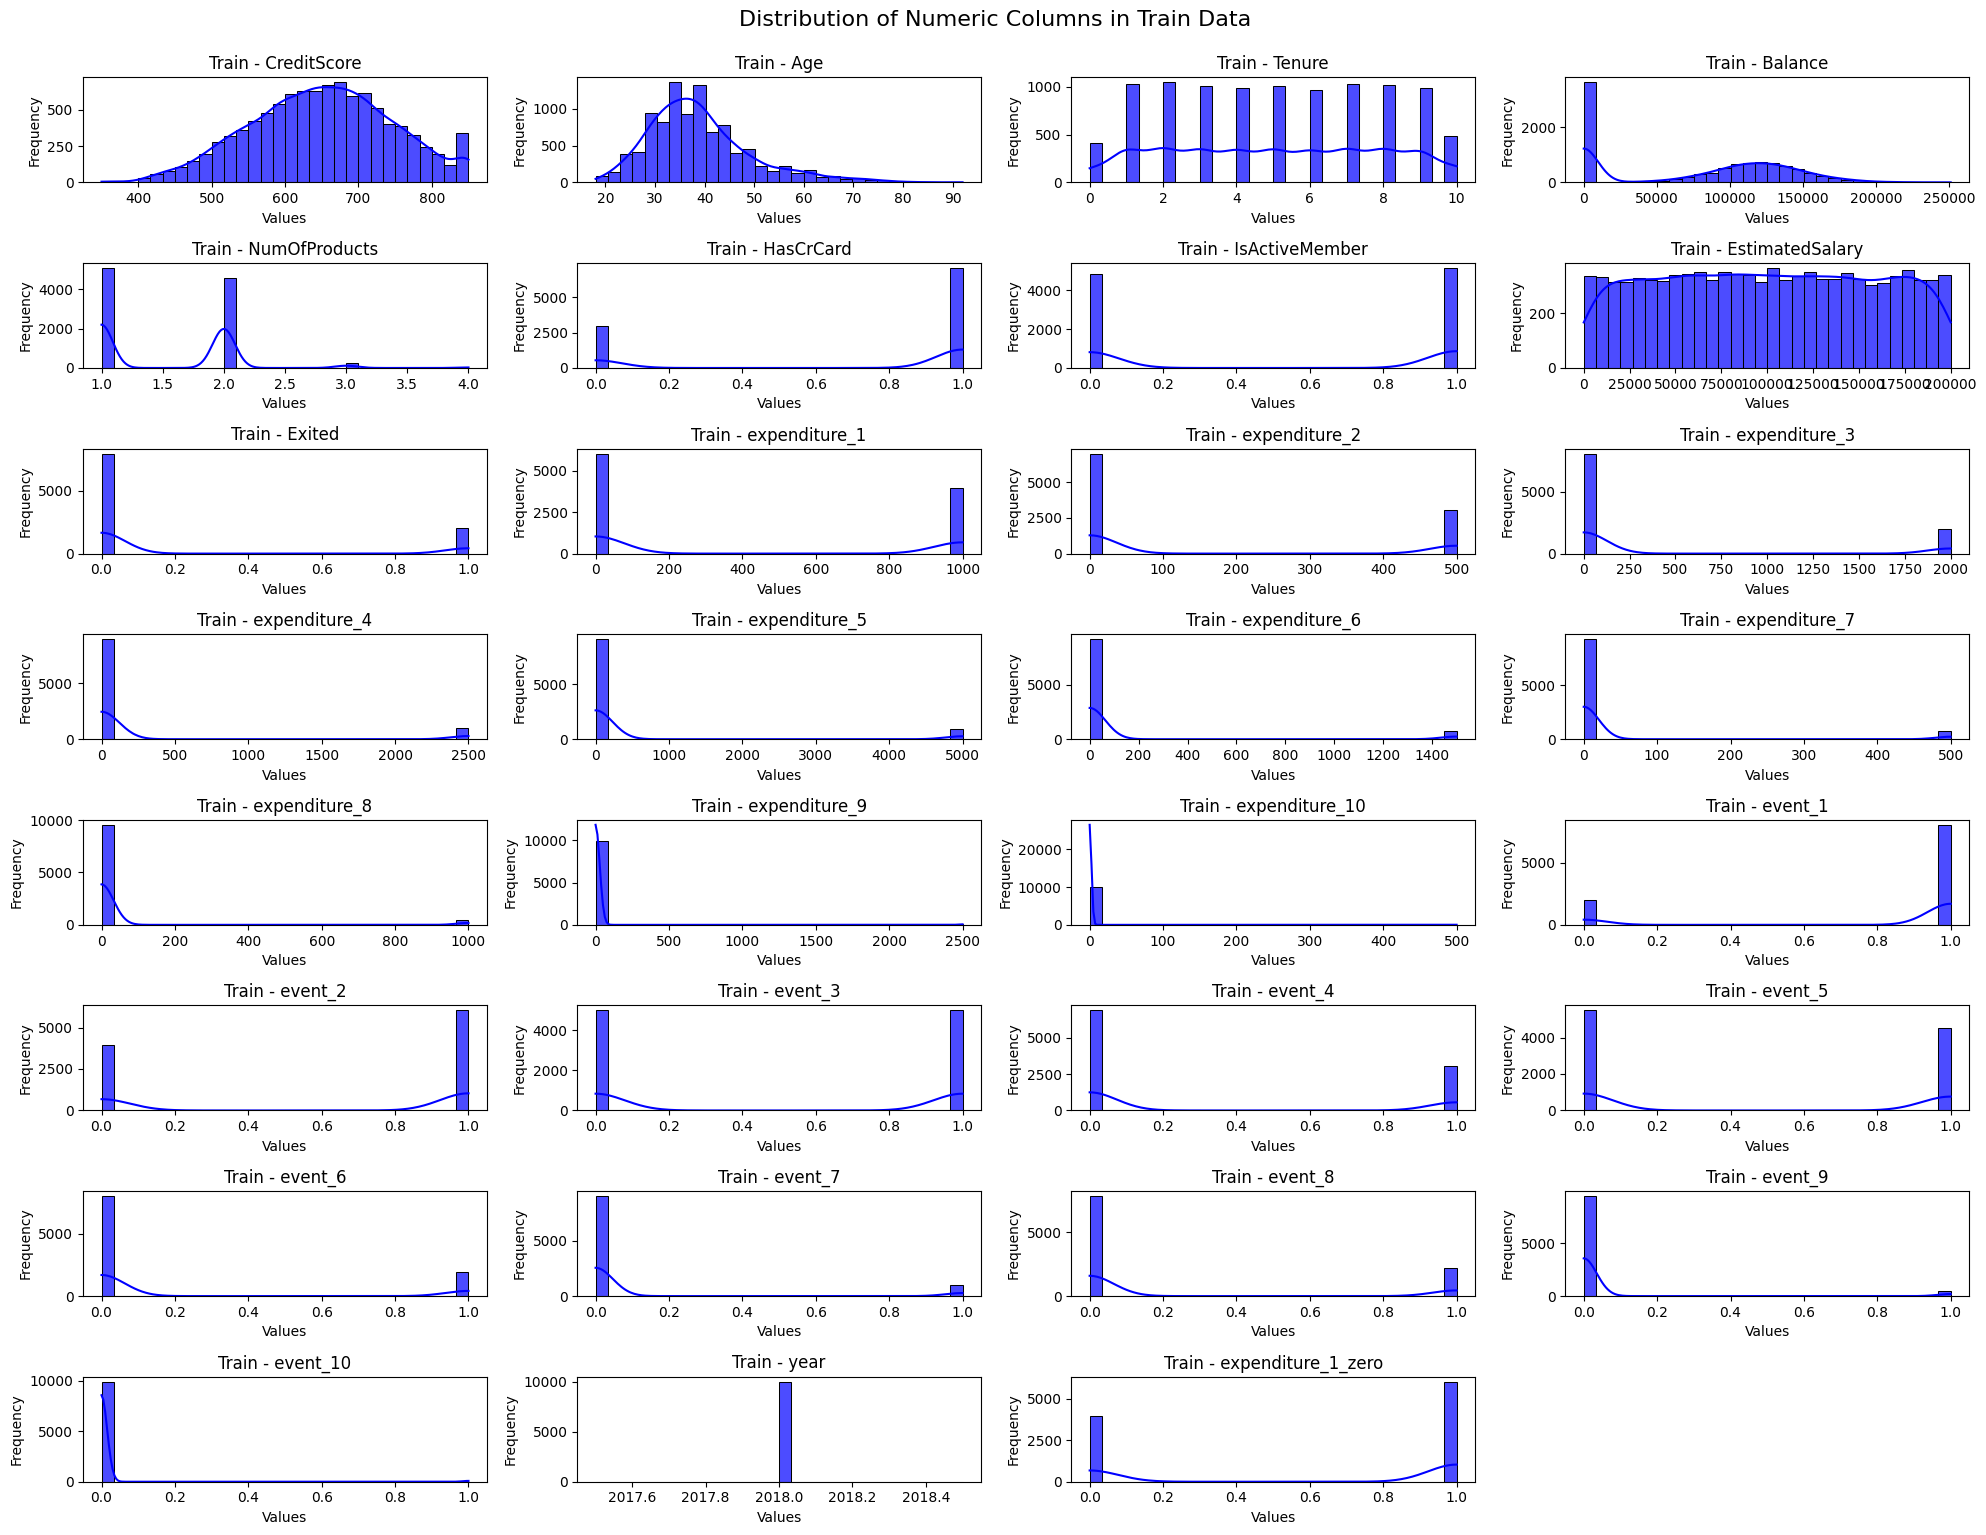

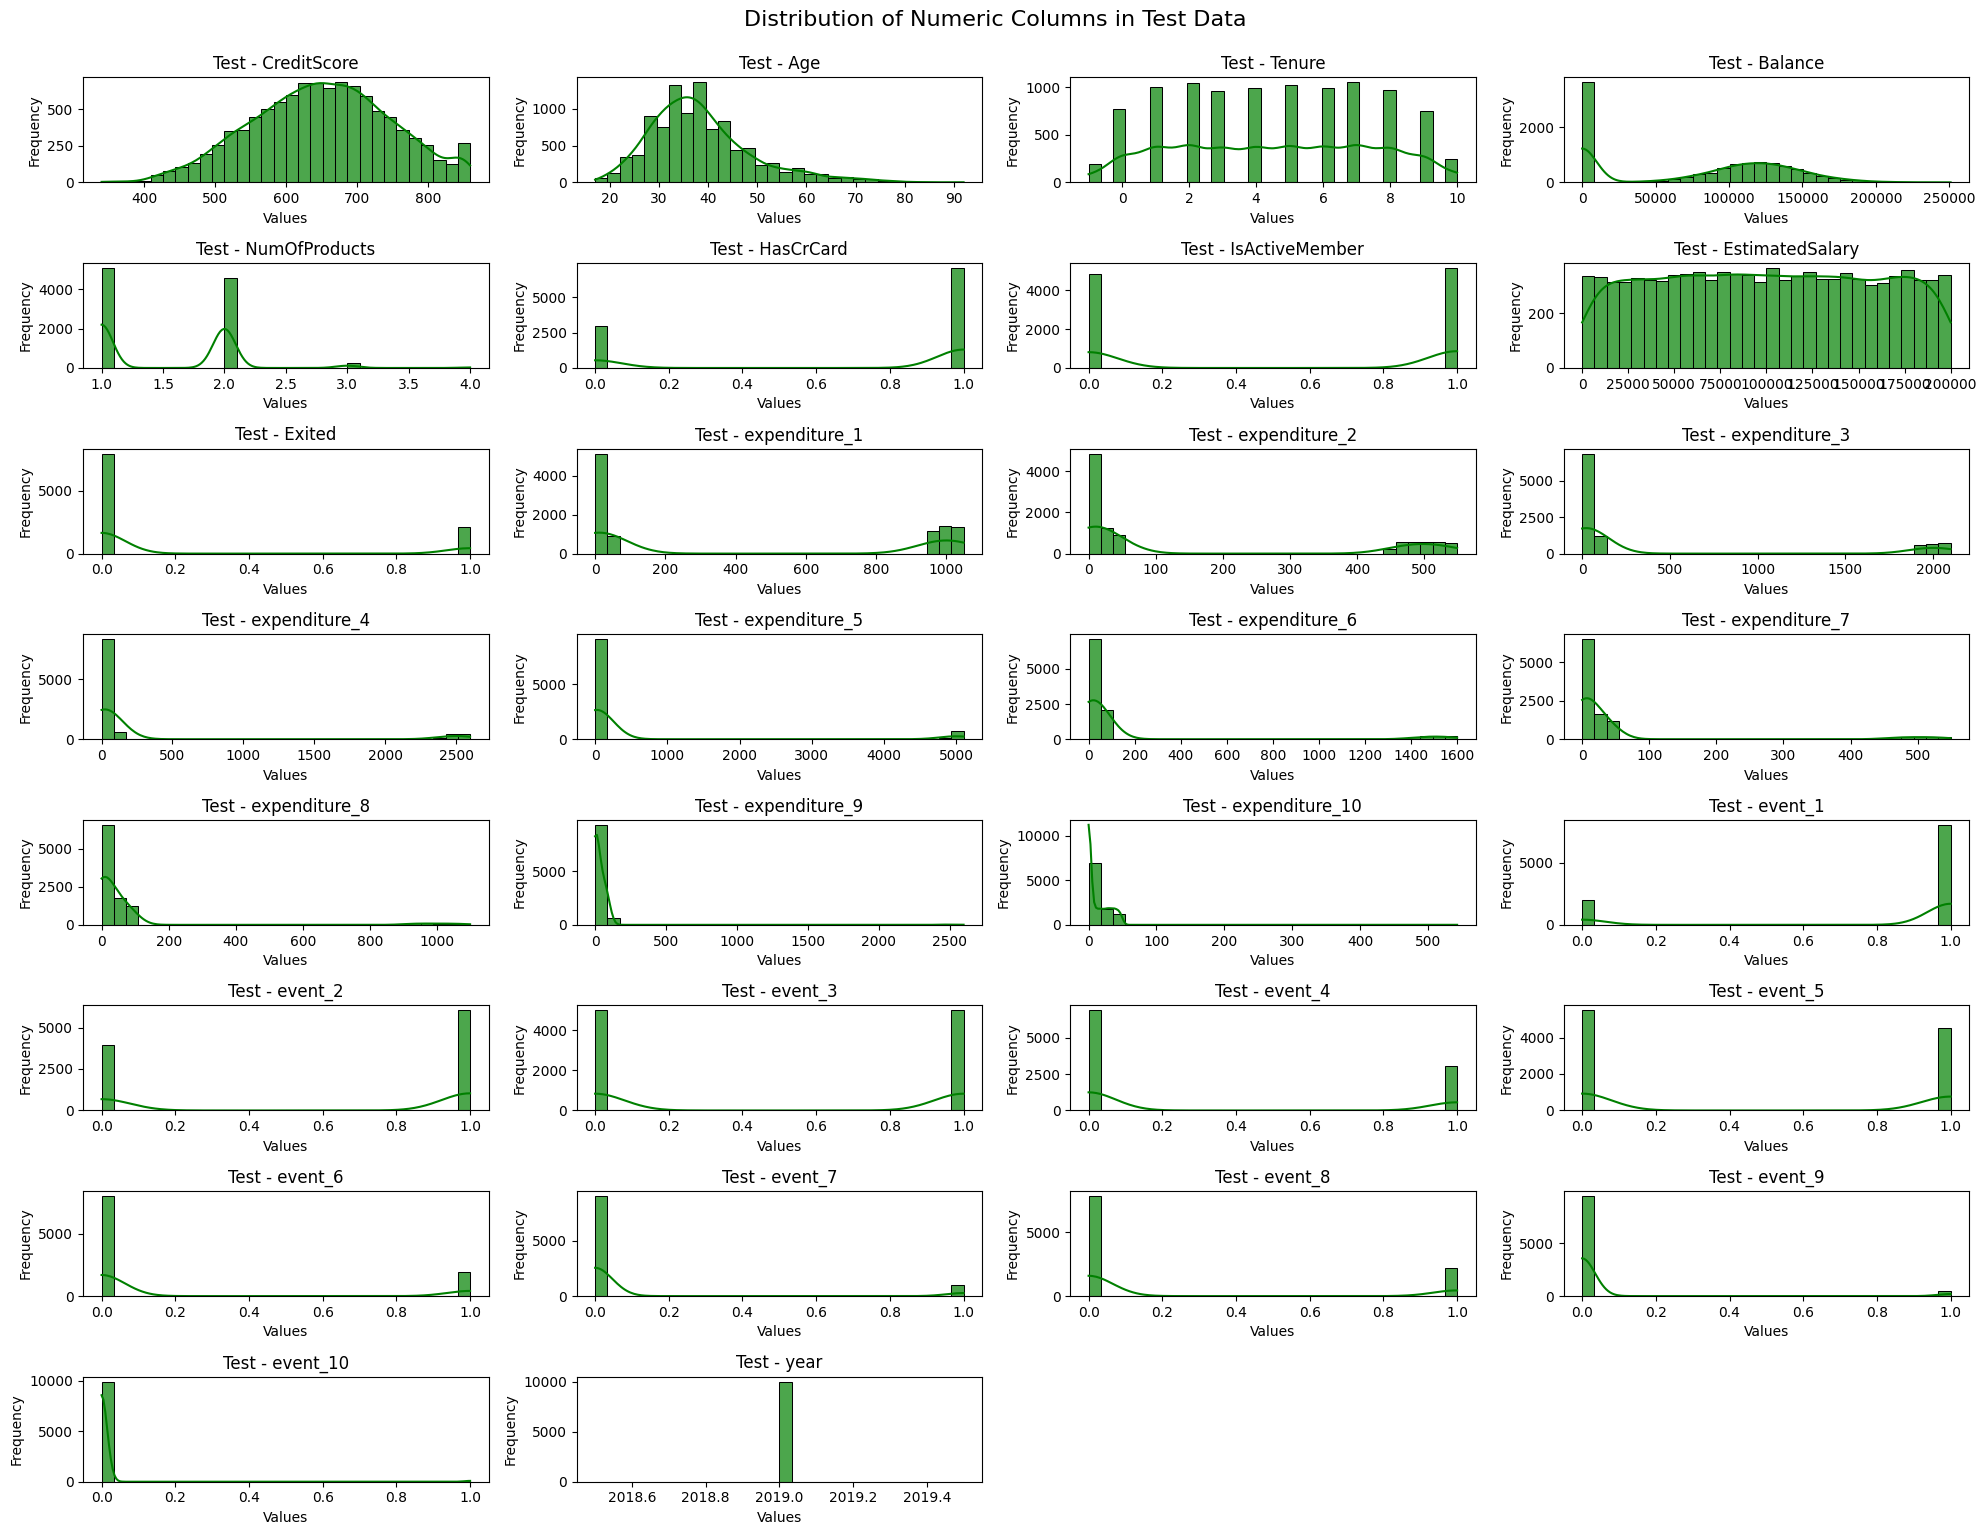

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
# Trainデータの数値列を可視化
plt.figure(figsize=(20, 15))
numeric_columns_train = train_data.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns_train, 1):
    plt.subplot((len(numeric_columns_train) // 4) + 1, 4, i)
    sns.histplot(train_data[column], kde=True, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f"Train - {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.suptitle("Distribution of Numeric Columns in Train Data", y=1.02, fontsize=16)
plt.show()

# Testデータの数値列を可視化
plt.figure(figsize=(20, 15))
numeric_columns_test = test_data.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns_test, 1):
    plt.subplot((len(numeric_columns_test) // 4) + 1, 4, i)
    sns.histplot(test_data[column], kde=True, bins=30, color='green', edgecolor='black', alpha=0.7)
    plt.title(f"Test - {column}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.suptitle("Distribution of Numeric Columns in Test Data", y=1.02, fontsize=16)
plt.show()

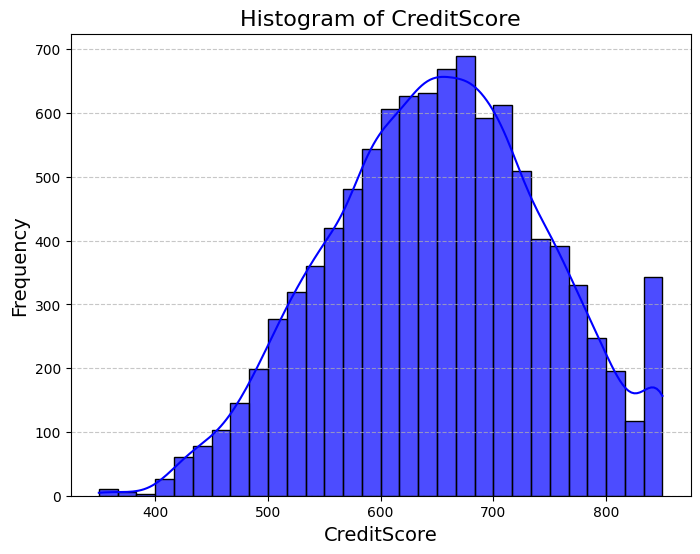

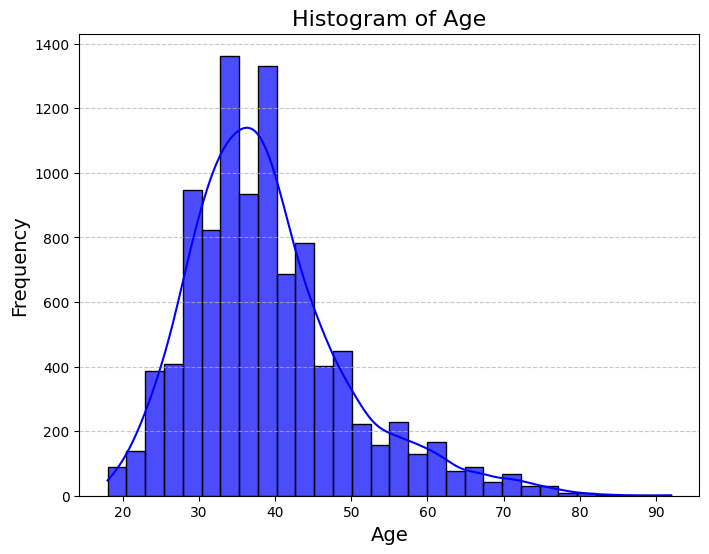

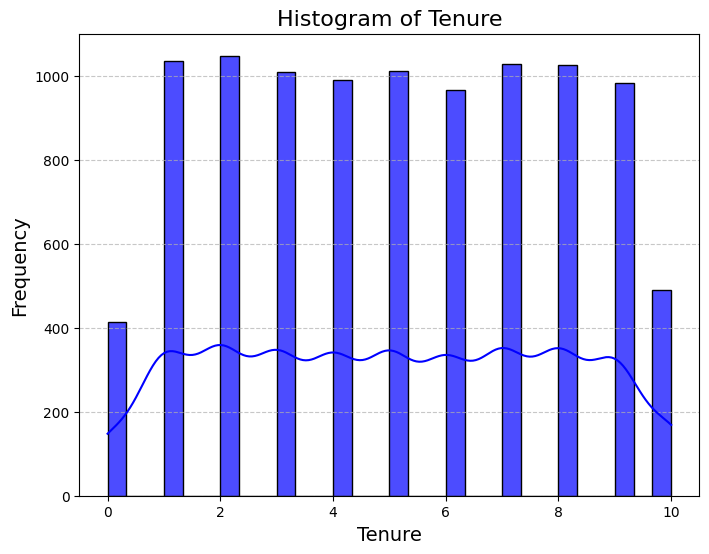

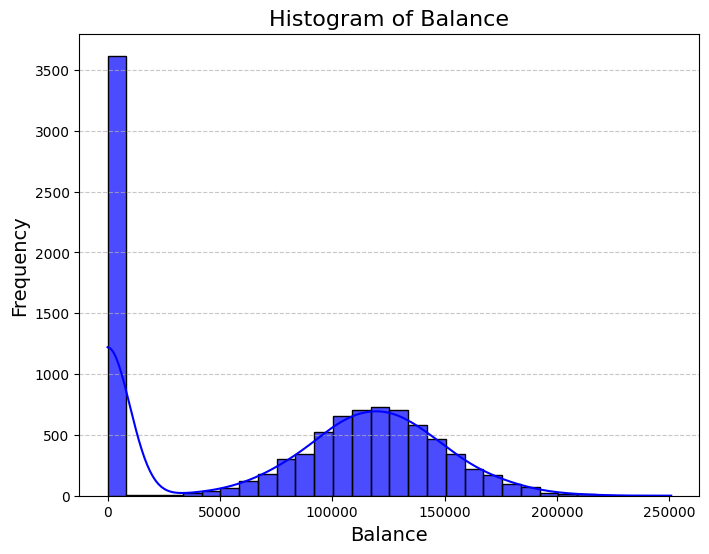

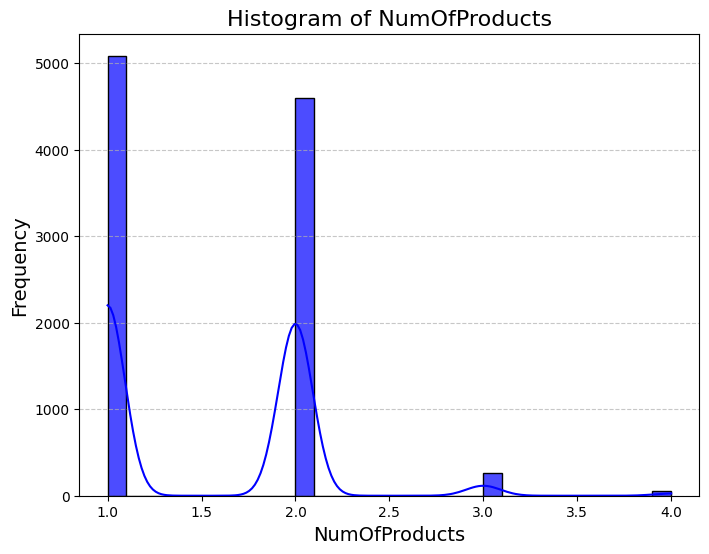

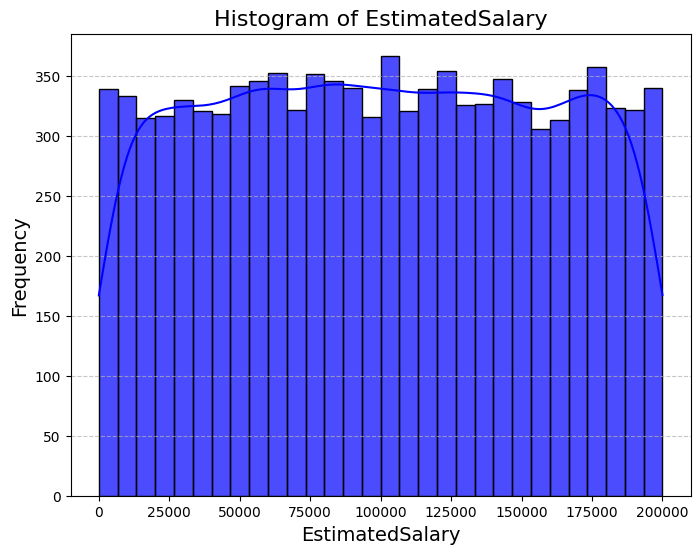

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


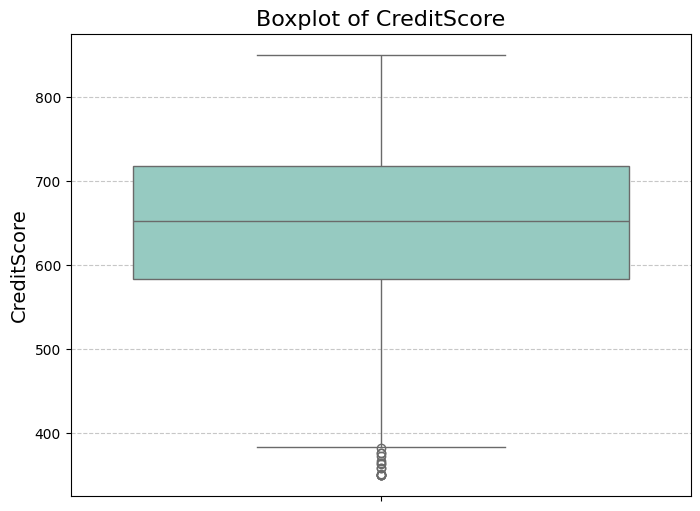

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


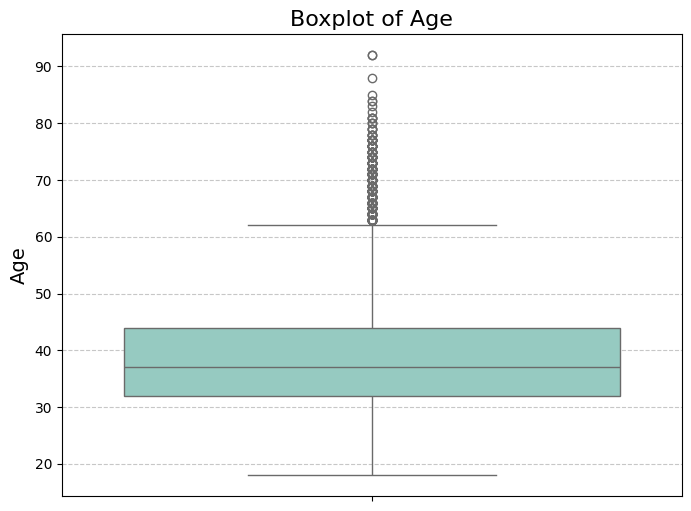

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


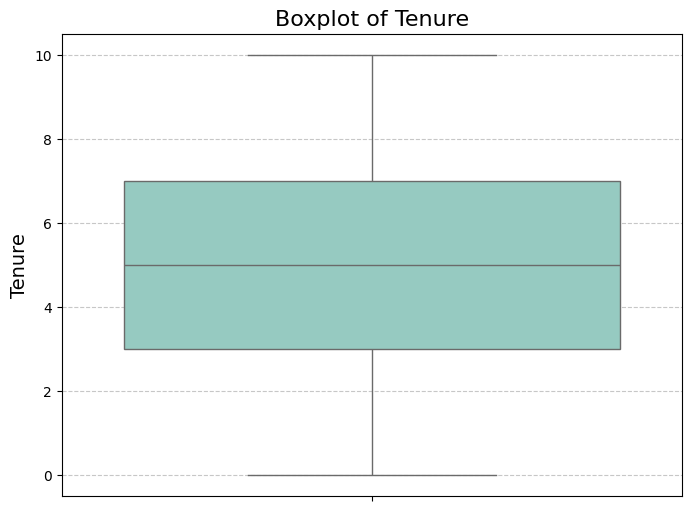

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


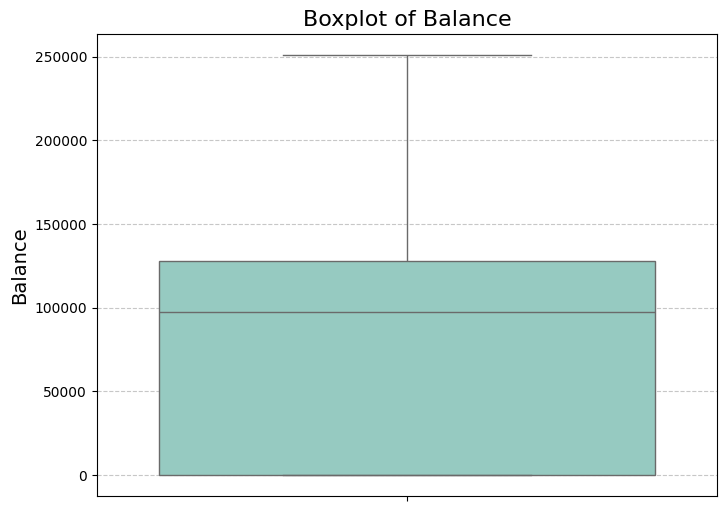

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


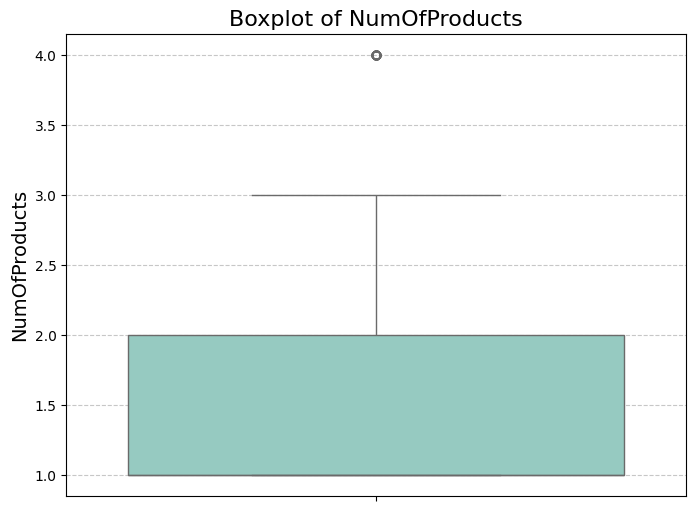

<ipython-input-76-f4bd158f14c6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, y=col, palette="Set3")


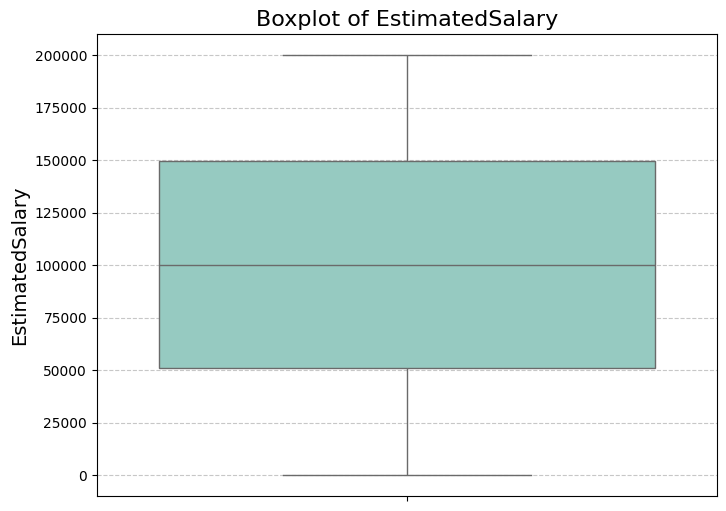

In [76]:
# 数値変数
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# ヒストグラム
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f"Histogram of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 箱ひげ図
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, y=col, palette="Set3")
    plt.title(f"Boxplot of {col}", fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 解約フラグとの関係

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


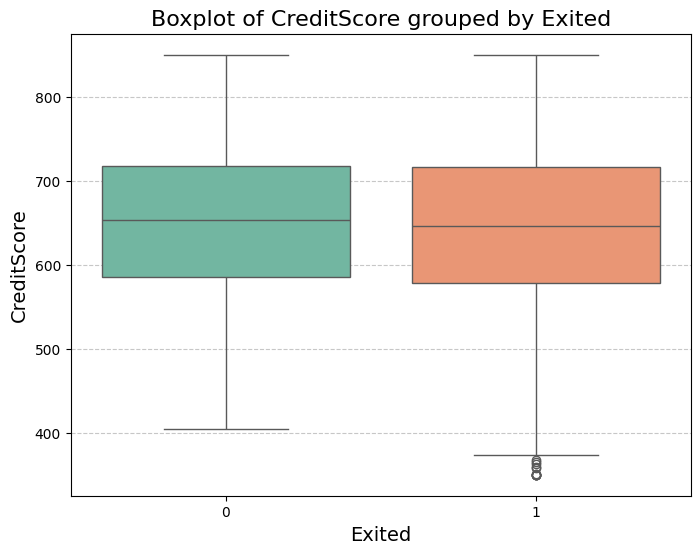

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


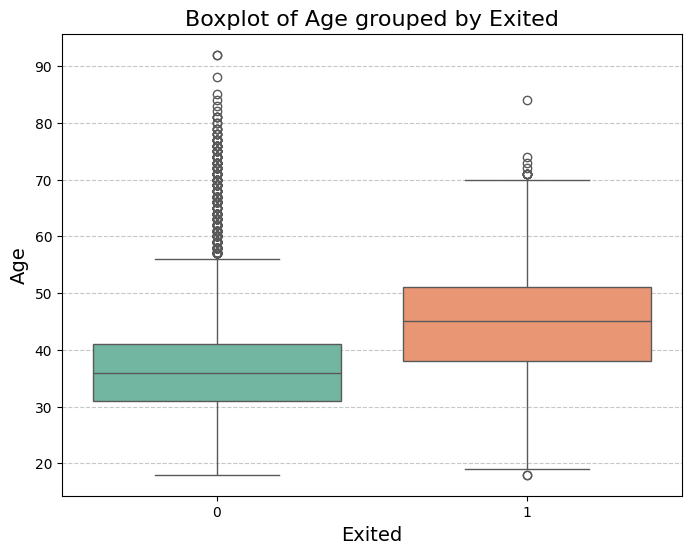

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


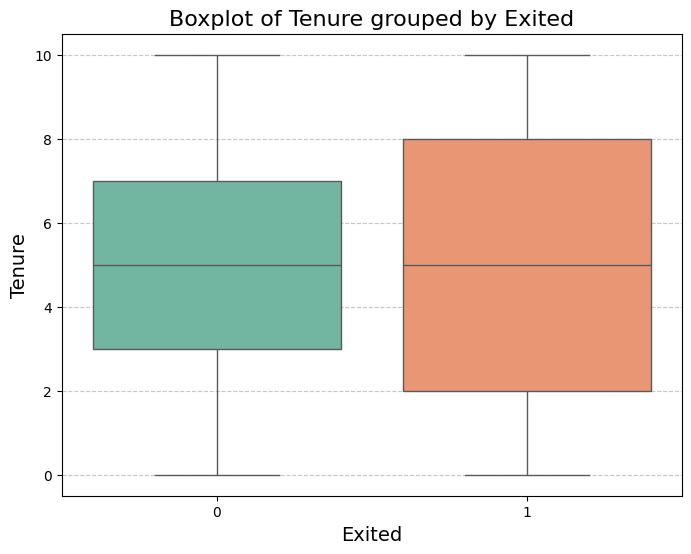

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


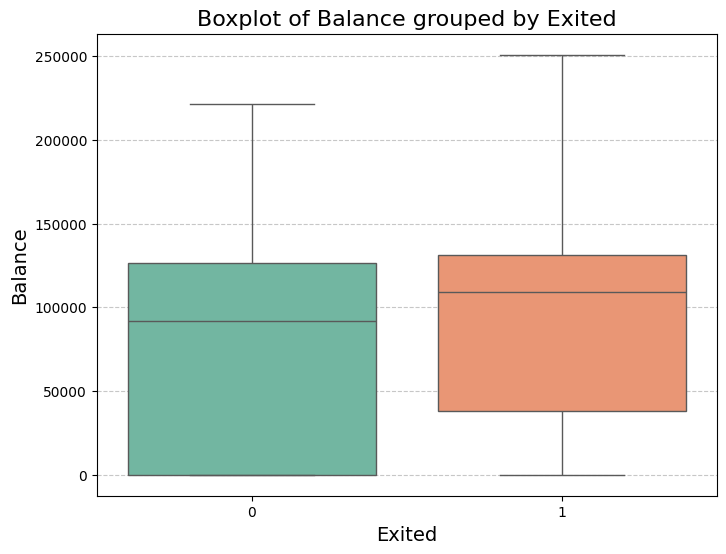

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


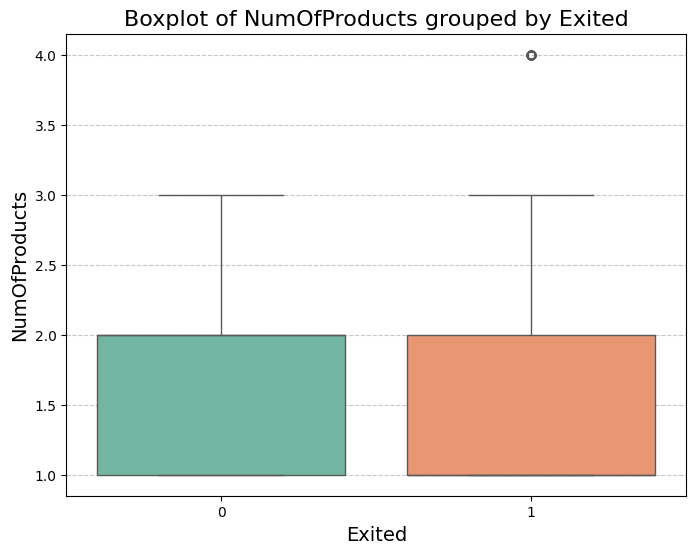

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


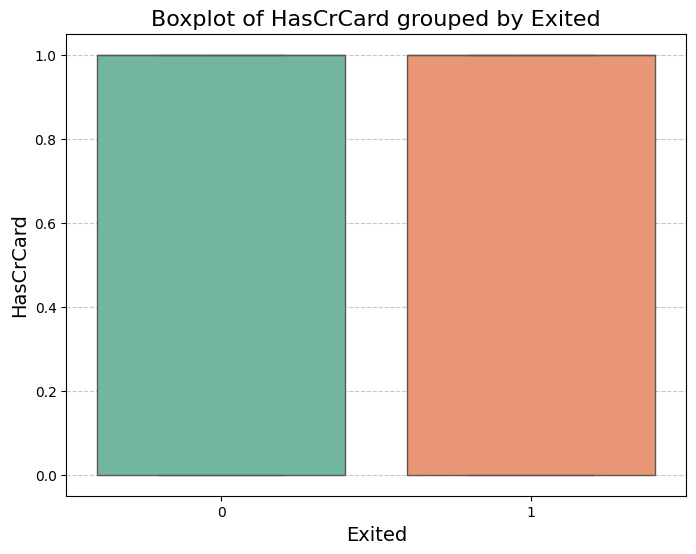

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


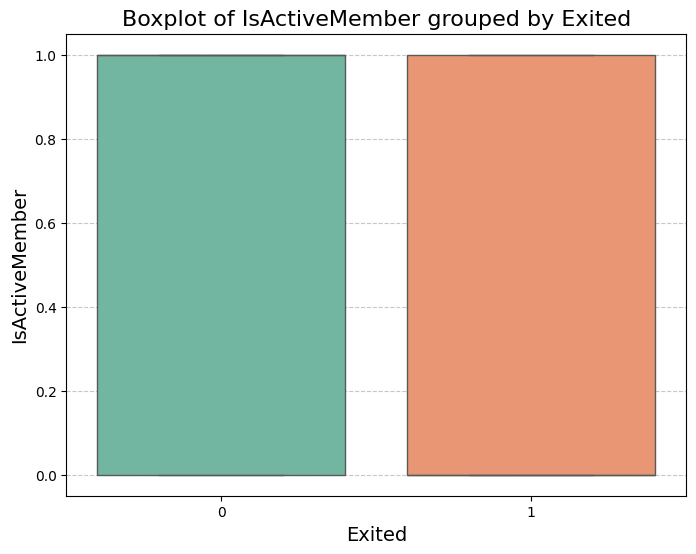

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


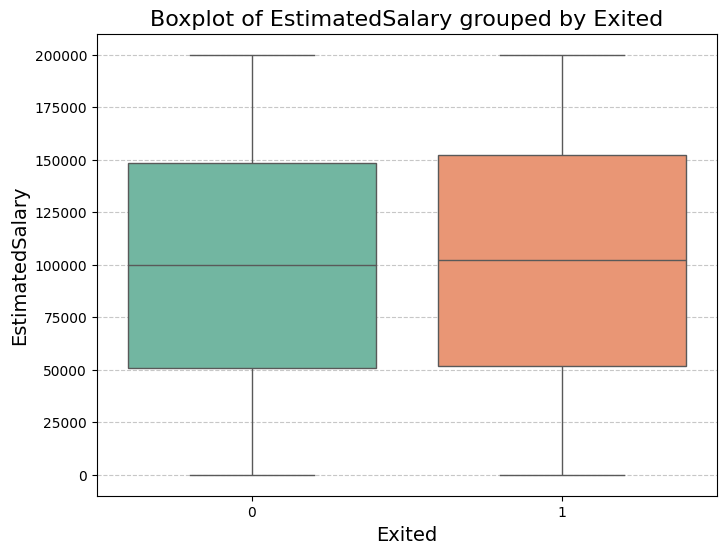

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


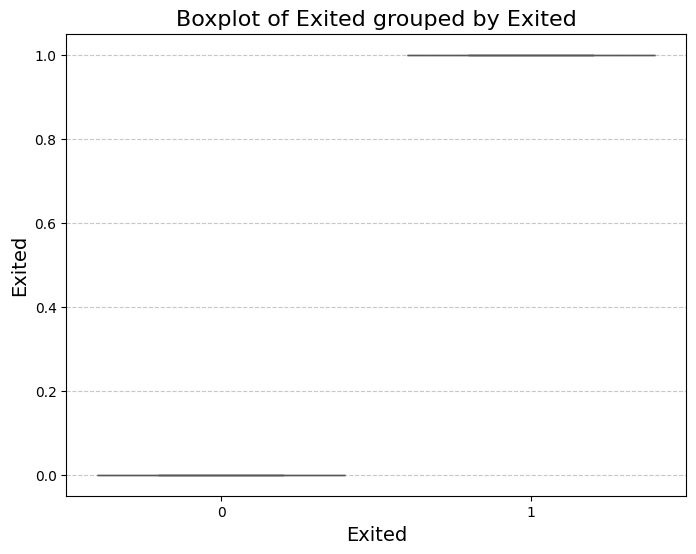

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


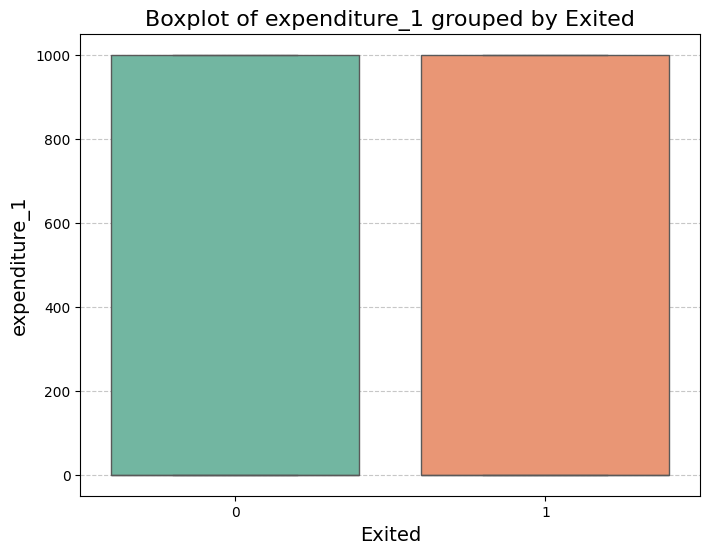

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


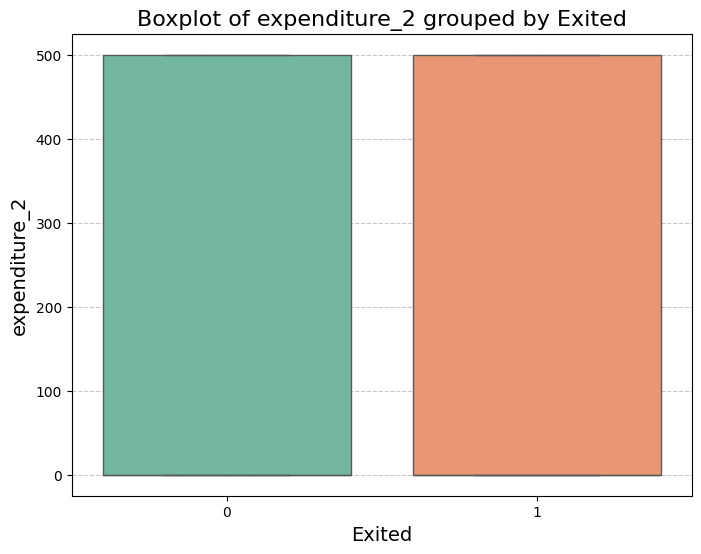

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


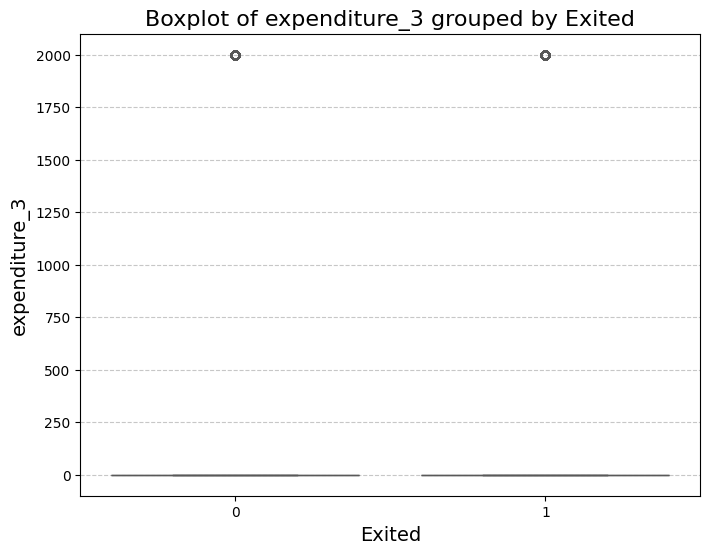

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


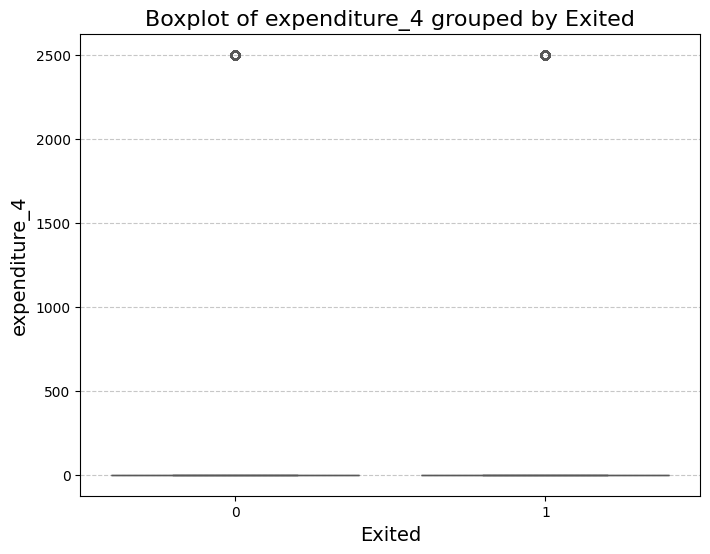

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


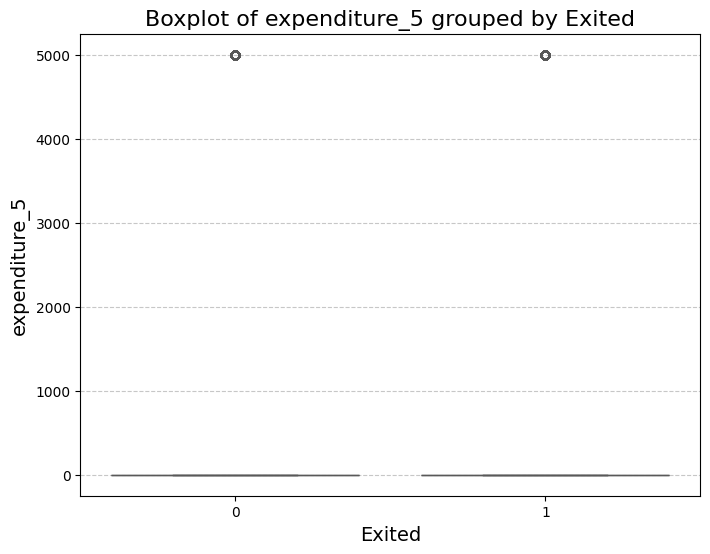

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


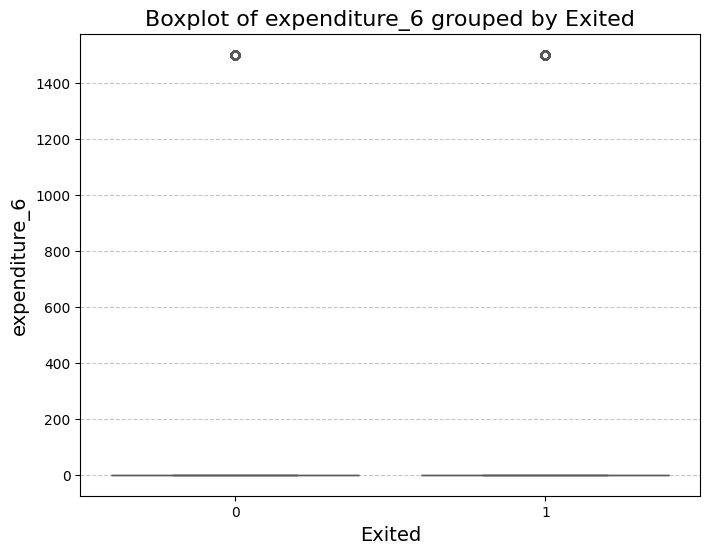

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


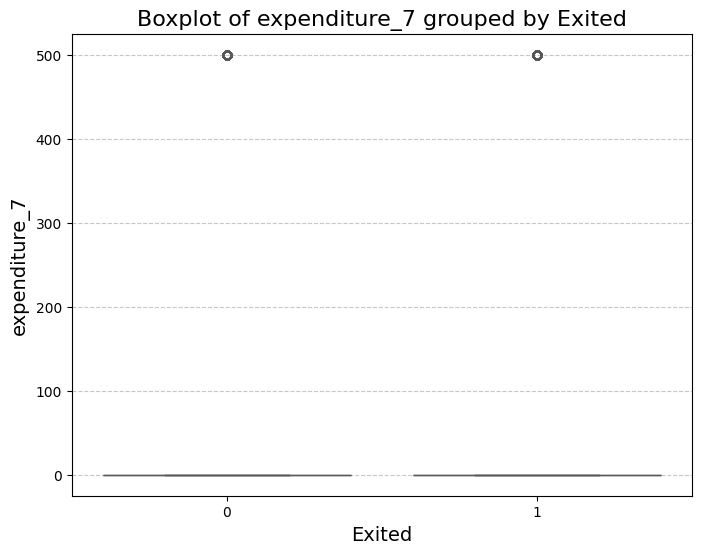

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


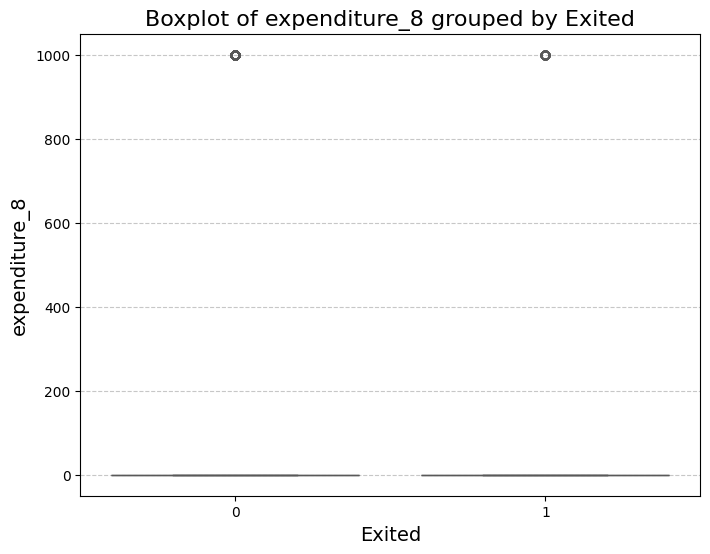

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


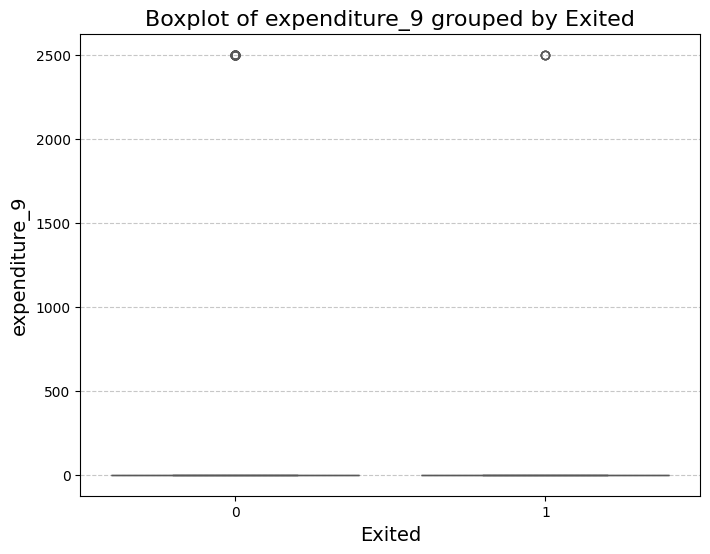

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


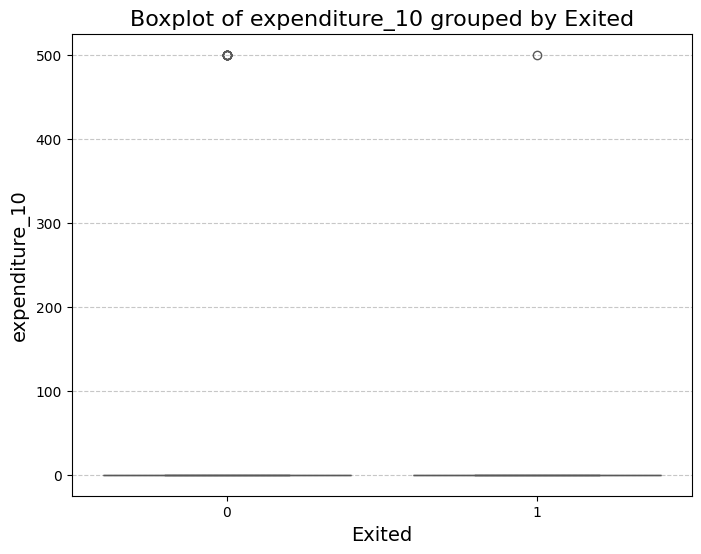

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


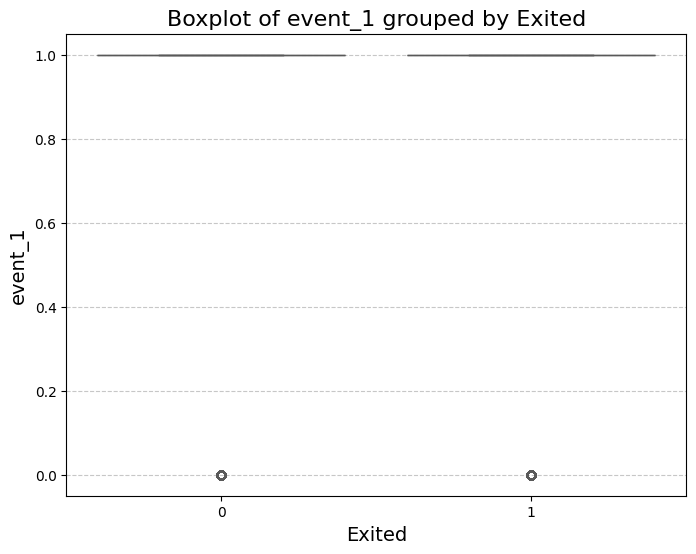

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


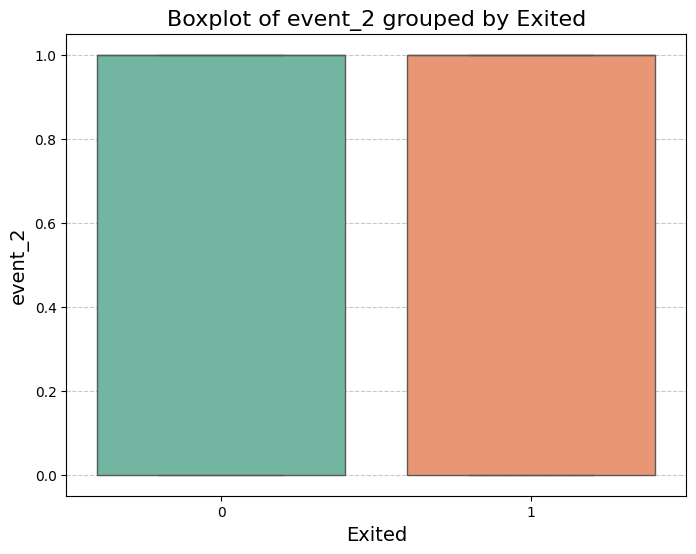

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


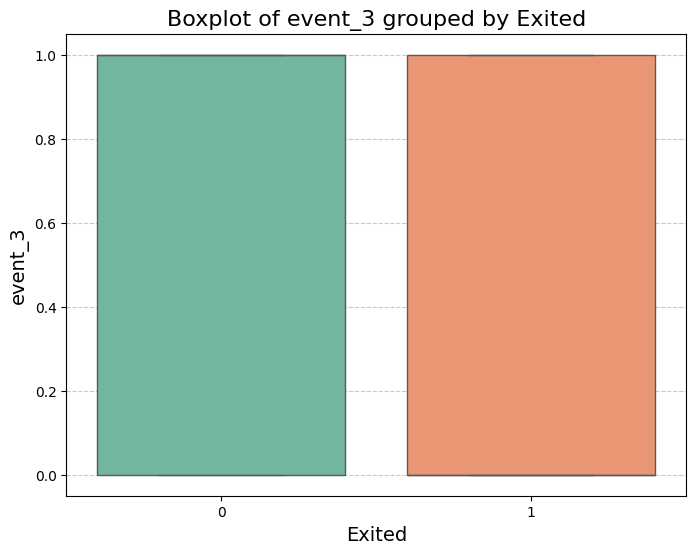

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


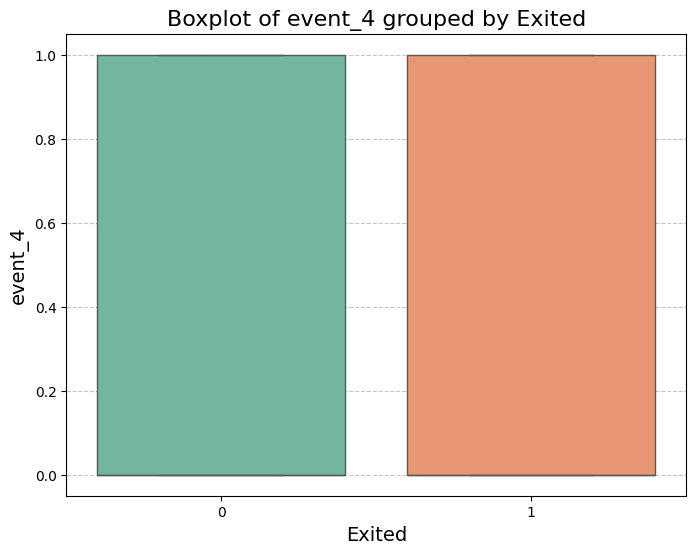

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


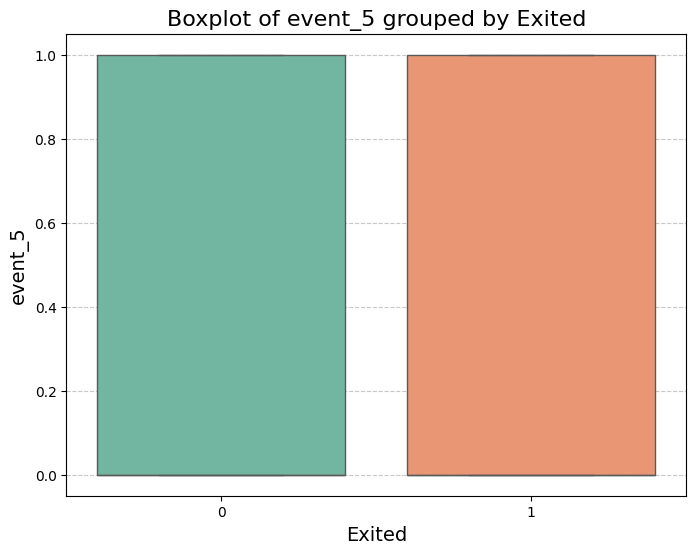

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


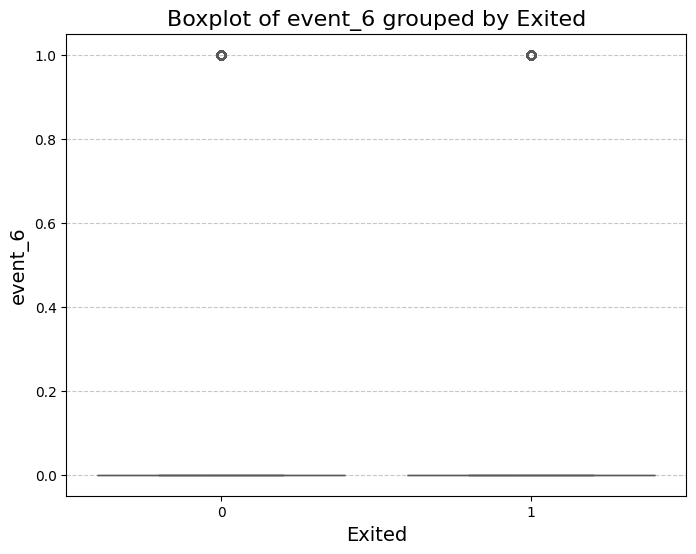

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


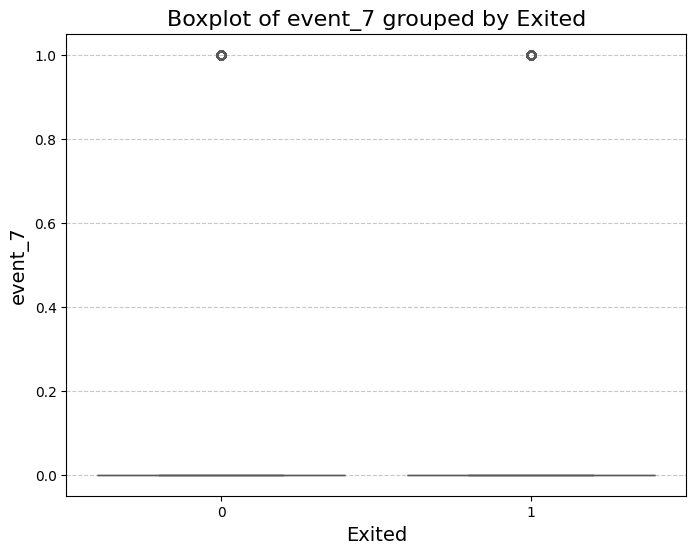

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


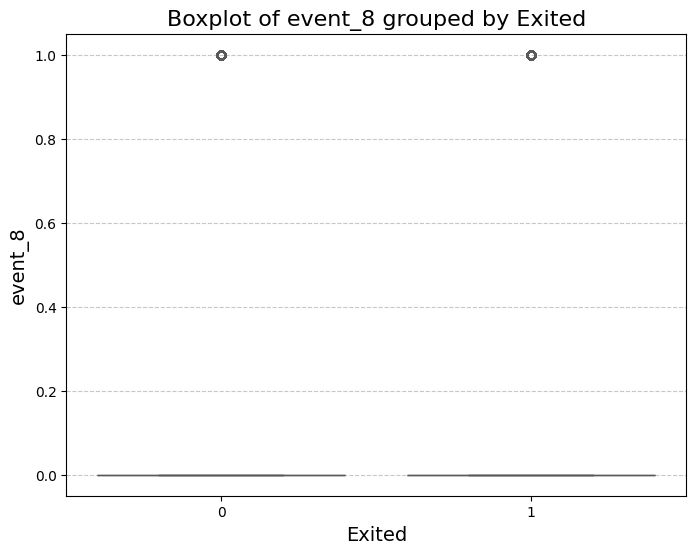

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


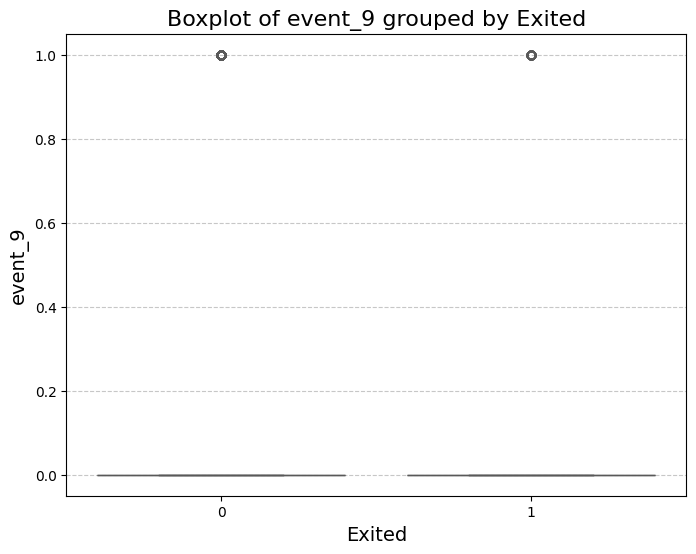

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


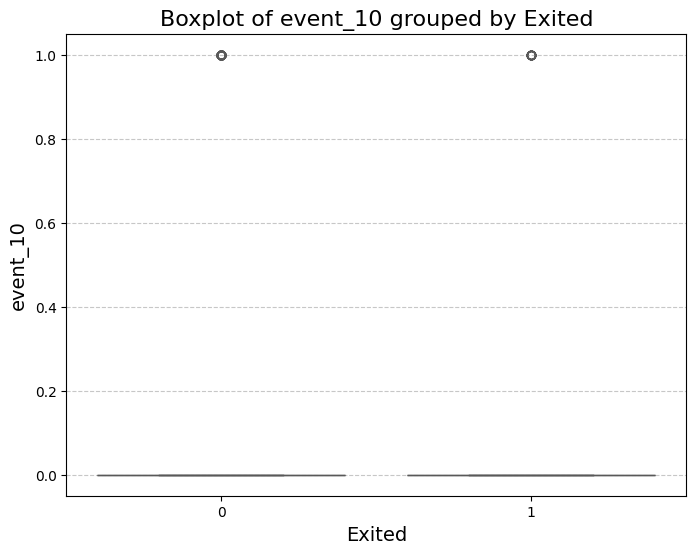

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


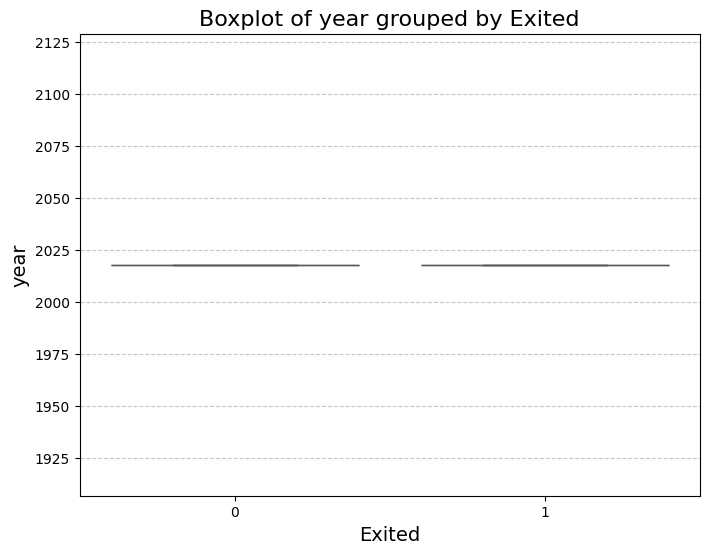

<ipython-input-74-15e8e2ff8fc4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")


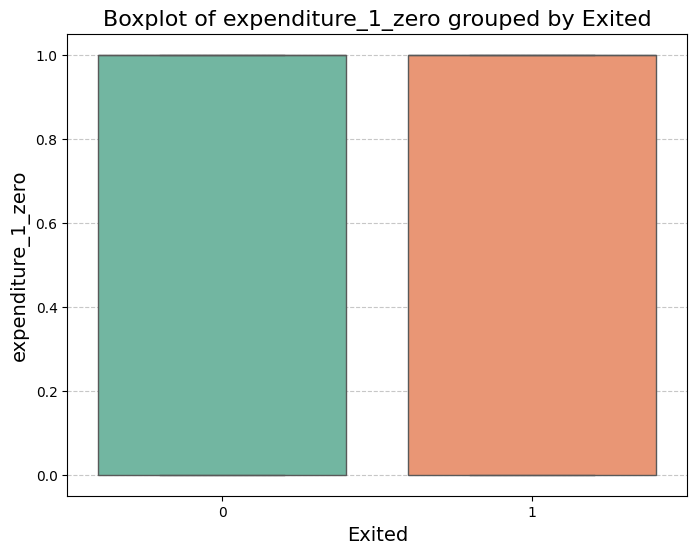

In [74]:
# 数値変数ごとに解約フラグで分布を比較 (箱ひげ図)
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, x='Exited', y=col, palette="Set2")
    plt.title(f"Boxplot of {col} grouped by Exited", fontsize=16)
    plt.xlabel("Exited", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# カテゴリ変数の分布 (棒グラフ)

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


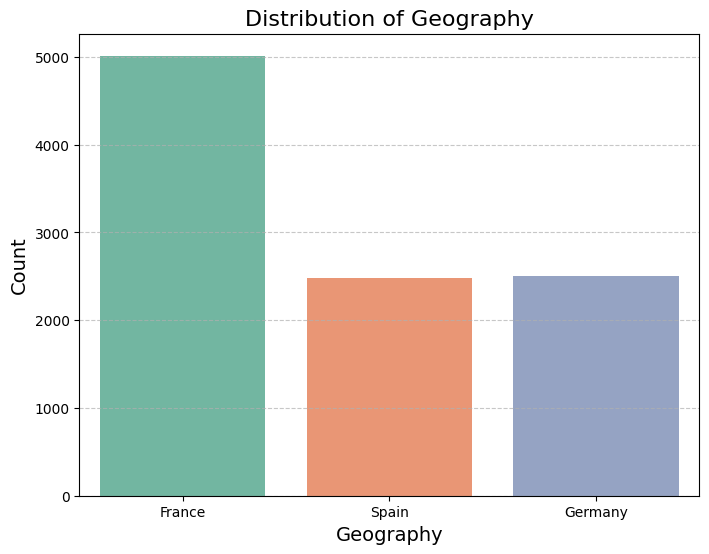

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


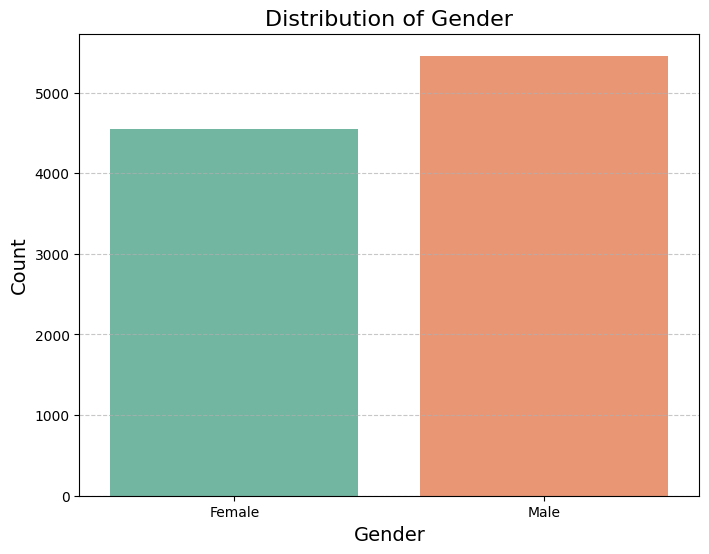

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


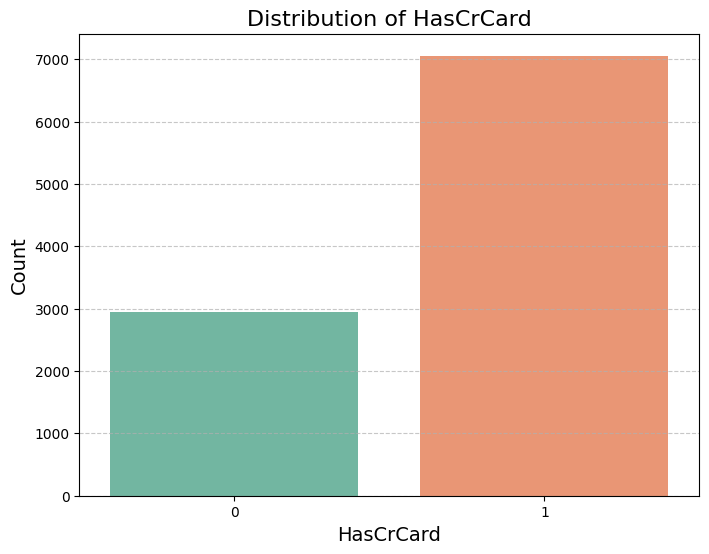

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


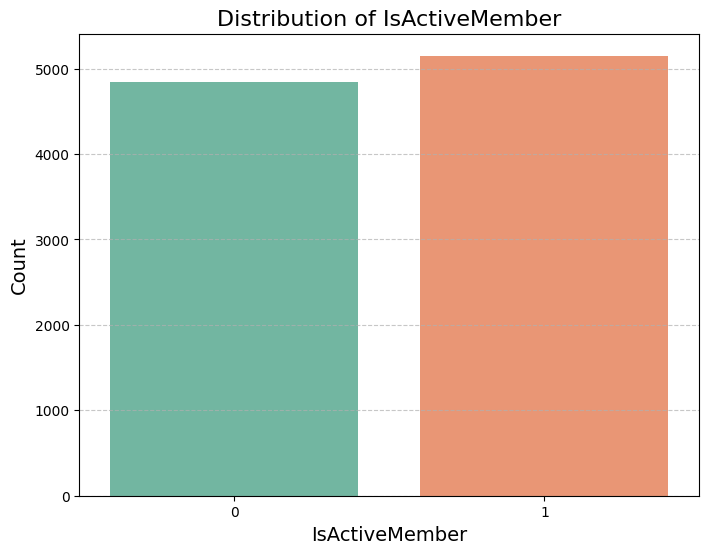

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


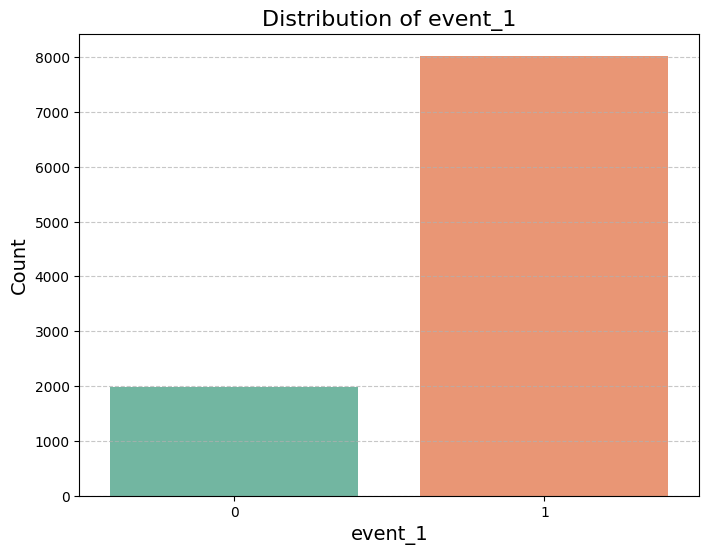

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


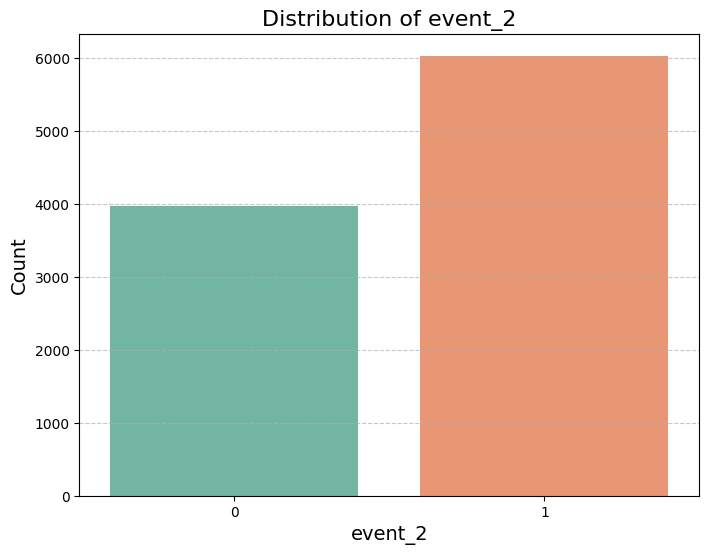

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


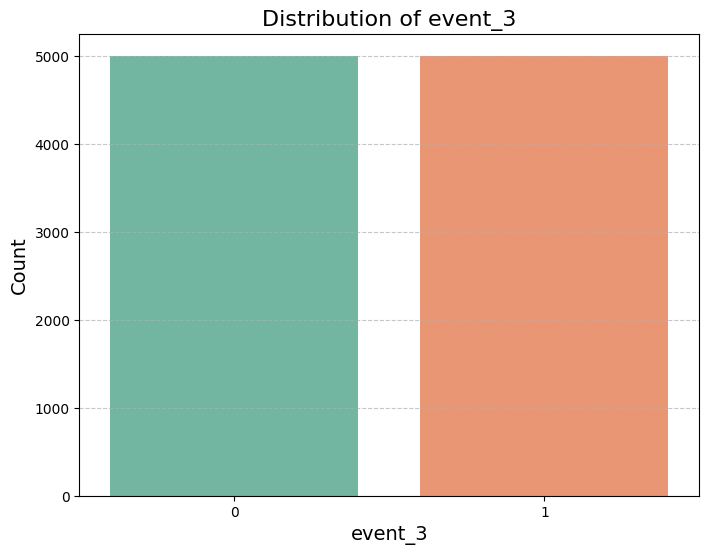

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


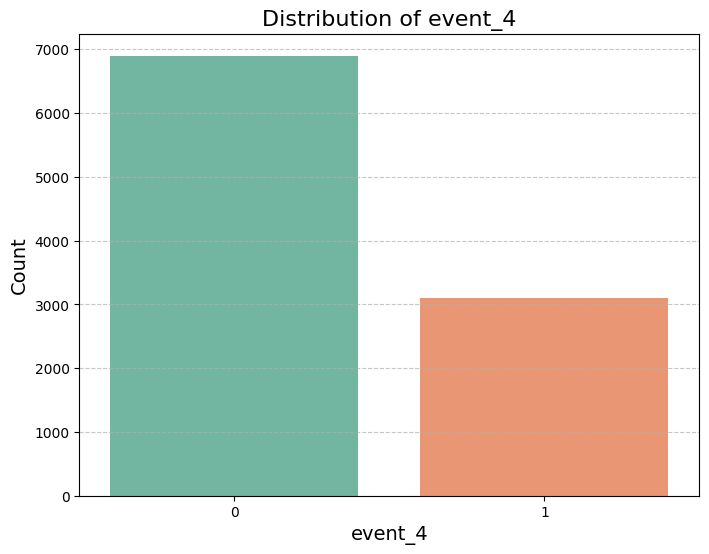

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


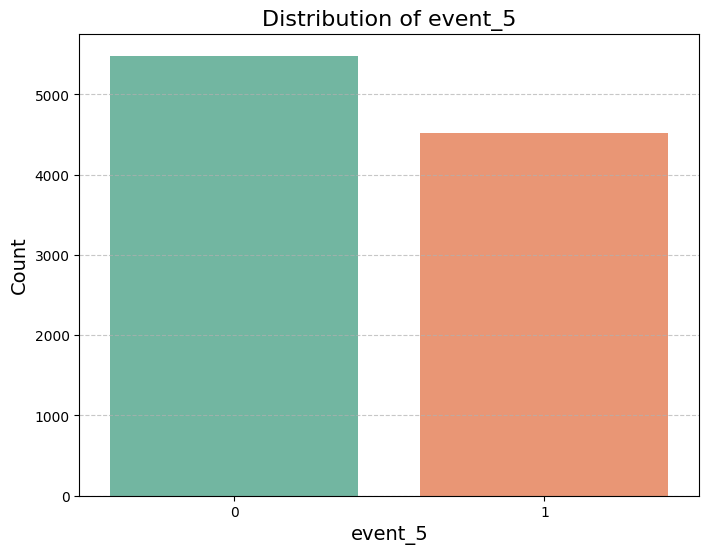

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


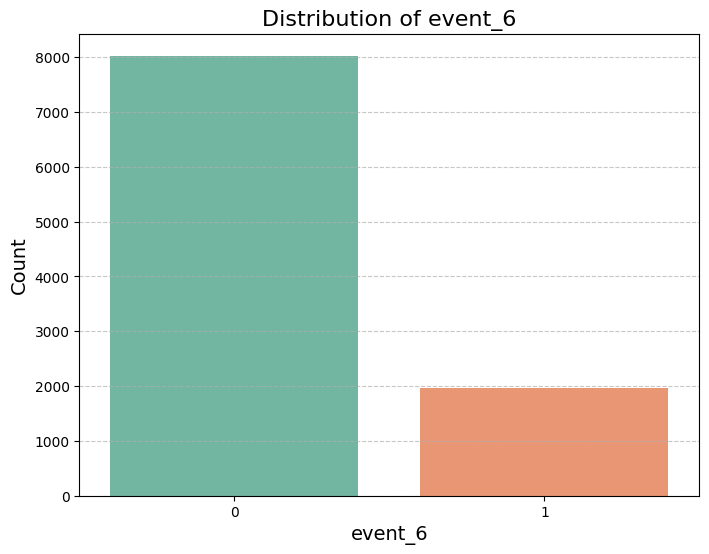

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


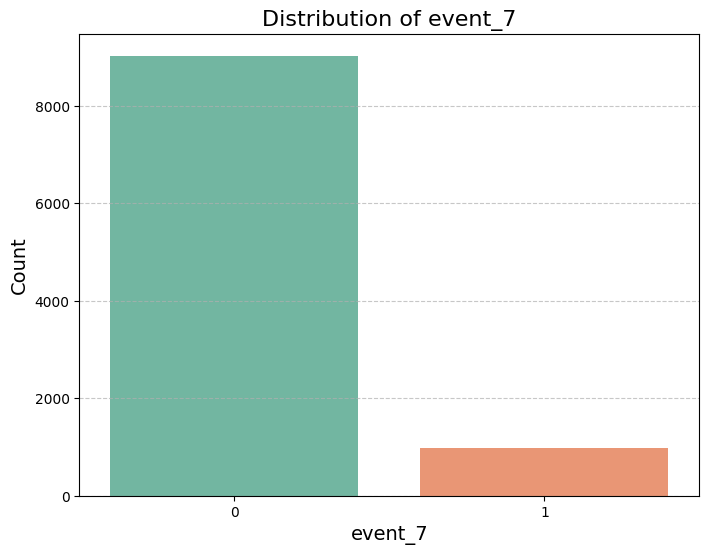

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


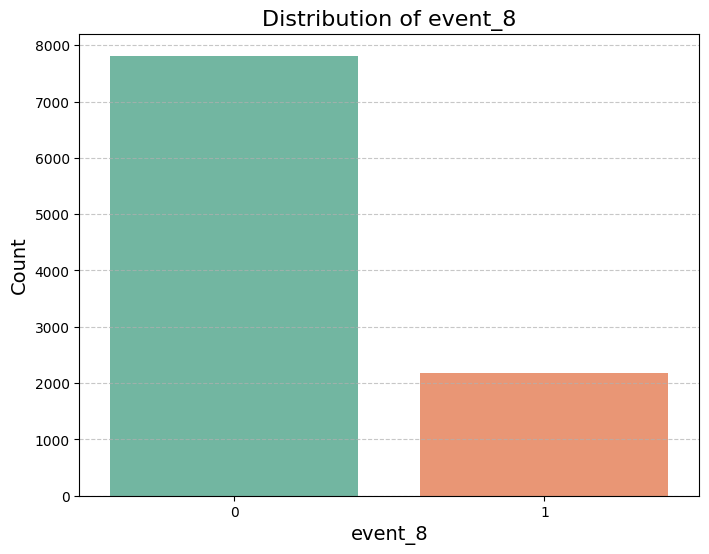

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


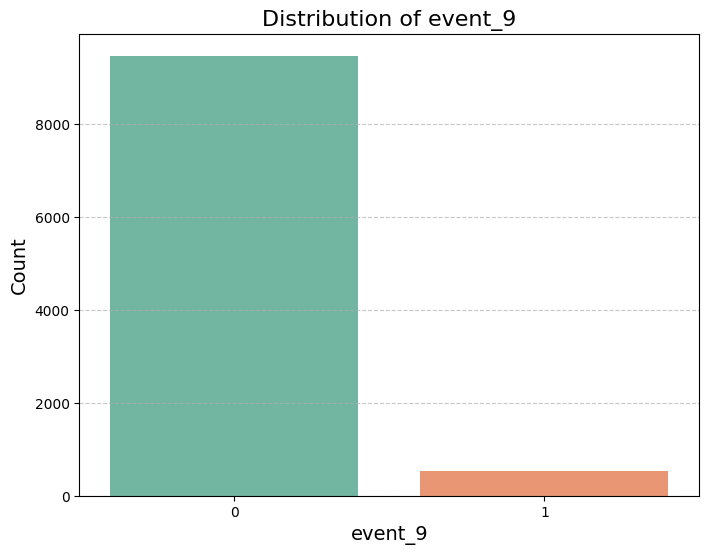

<ipython-input-73-530e2ab02bf9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette="Set2")


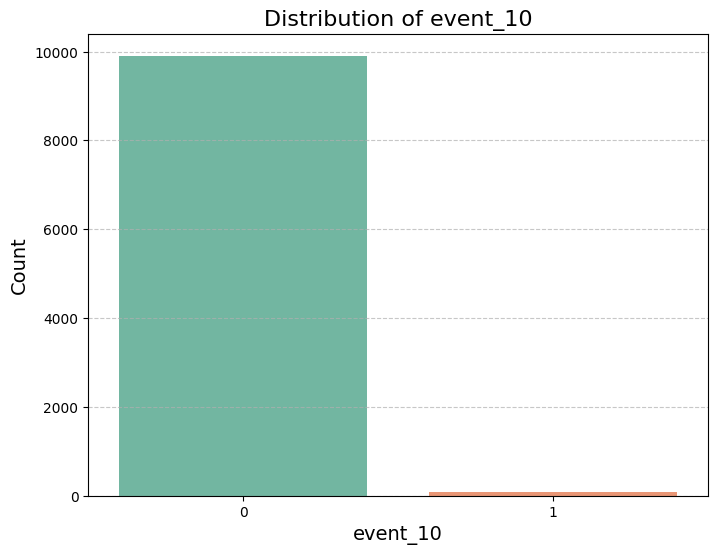

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# カテゴリ変数
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'] + \
                      [f'event_{i}' for i in range(1, 11)]

# 棒グラフで分布を可視化
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=col, palette="Set2")
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### データクリーニング

In [27]:
# 異常値修正
def fix_anomalies(data):
    # Balance列の異常値修正（負の値を0に置換）
    if 'Balance' in data.columns:
        data['Balance'] = data['Balance'].apply(lambda x: max(x, 0))

    # expenditure列の異常値修正（負の値を0に置換）
    expenditure_columns = [col for col in data.columns if 'expenditure' in col]
    for col in expenditure_columns:
        data[col] = data[col].apply(lambda x: max(x, 0))

    return data

# 学習データとテストデータの異常値修正
train_data_fixed = fix_anomalies(train_data)
test_data_fixed = fix_anomalies(test_data)

# 修正後のデータの確認
print("Train Data (First 5 Rows):")
train_data_fixed.head()


Train Data (First 5 Rows):

Test Data (First 5 Rows):


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year
0,621,France,Female,41,2,65.00,1,1,1,101347.88,...,0,1,0,0,0,1,1,0,0,2019
1,615,Spain,Female,40,1,83762.86,1,0,1,112541.58,...,0,0,1,1,0,0,0,0,0,2019
2,495,France,Female,41,7,159659.80,3,1,0,113931.57,...,0,0,0,1,0,0,1,0,0,2019
3,704,France,Female,38,1,92.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,2019
4,859,Spain,Female,43,2,125536.82,1,1,1,79084.10,...,1,1,1,0,0,1,0,0,0,2019


In [28]:
print("\nTest Data (First 5 Rows):")
test_data_fixed.head()


Test Data (First 5 Rows):


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,year
0,621,France,Female,41,2,65.00,1,1,1,101347.88,...,0,1,0,0,0,1,1,0,0,2019
1,615,Spain,Female,40,1,83762.86,1,0,1,112541.58,...,0,0,1,1,0,0,0,0,0,2019
2,495,France,Female,41,7,159659.80,3,1,0,113931.57,...,0,0,0,1,0,0,1,0,0,2019
3,704,France,Female,38,1,92.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,2019
4,859,Spain,Female,43,2,125536.82,1,1,1,79084.10,...,1,1,1,0,0,1,0,0,0,2019


In [30]:
test_data_fixed.shape

(10000, 32)

In [31]:
train_data_fixed.shape

(10000, 32)

**One-Hotエンコーディング**

In [40]:
# One-Hotエンコーディング関数
# 多重共線性回避のためdrop_first=Trueでフランスを削除
def one_hot_encode(data, categorical_columns):
    """
    Categorical columns will be one-hot encoded.
    :param data: DataFrame
    :param categorical_columns: List of categorical column names
    :return: One-hot encoded DataFrame
    """
    return pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

# カテゴリ変数を特定
categorical_columns = ['Geography', 'Gender']  # 実際のカテゴリ変数に置き換えてください

# 学習データのエンコーディング
train_data_encoded = one_hot_encode(train_data_fixed, categorical_columns)

# テストデータのエンコーディング
test_data_encoded = one_hot_encode(test_data_fixed, categorical_columns)


# 修正後のデータ確認
print("Train Data After Encoding (First 5 Rows):")
print(train_data_encoded.head())

print("\nTest Data After Encoding (First 5 Rows):")
print(test_data_encoded.head())


Train Data After Encoding (First 5 Rows):
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  expenditure_1  ...  event_5  \
0               1        101348.88       1           1000  ...        0   
1               1        112542.58       0           1000  ...        1   
2               0        113931.57       1              0  ...        1   
3               0         93826.63       0           1000  ...        0   
4               1         79084.10       0           1000  ...        0   

   event_6  event_7  event_8  event_9  event_10  year  Geography_Germany  \
0        0        1   

In [41]:
test_data_fixed.shape

(10000, 32)

In [42]:
train_data_fixed.shape

(10000, 32)

In [55]:
train_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_5,event_6,event_7,event_8,event_9,event_10,year,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1000,...,0,0,1,1,0,0,2018,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1000,...,1,0,0,0,0,0,2018,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,...,1,0,0,1,0,0,2018,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1000,...,0,0,0,0,0,0,2018,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1000,...,0,0,1,0,0,0,2018,0,1,0


In [56]:
test_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,expenditure_1,...,event_5,event_6,event_7,event_8,event_9,event_10,year,Geography_Germany,Geography_Spain,Gender_Male
0,621,41,2,65.00,1,1,1,101347.88,1,956,...,0,0,1,1,0,0,2019,0,0,0
1,615,40,1,83762.86,1,0,1,112541.58,0,1013,...,1,0,0,0,0,0,2019,0,1,0
2,495,41,7,159659.80,3,1,0,113931.57,1,0,...,1,0,0,1,0,0,2019,0,0,0
3,704,38,1,92.00,2,0,0,93826.63,0,991,...,0,0,0,0,0,0,2019,0,0,0
4,859,43,2,125536.82,1,1,1,79084.10,1,968,...,0,0,1,0,0,0,2019,0,1,0


# 特徴量選択

相関を分析する

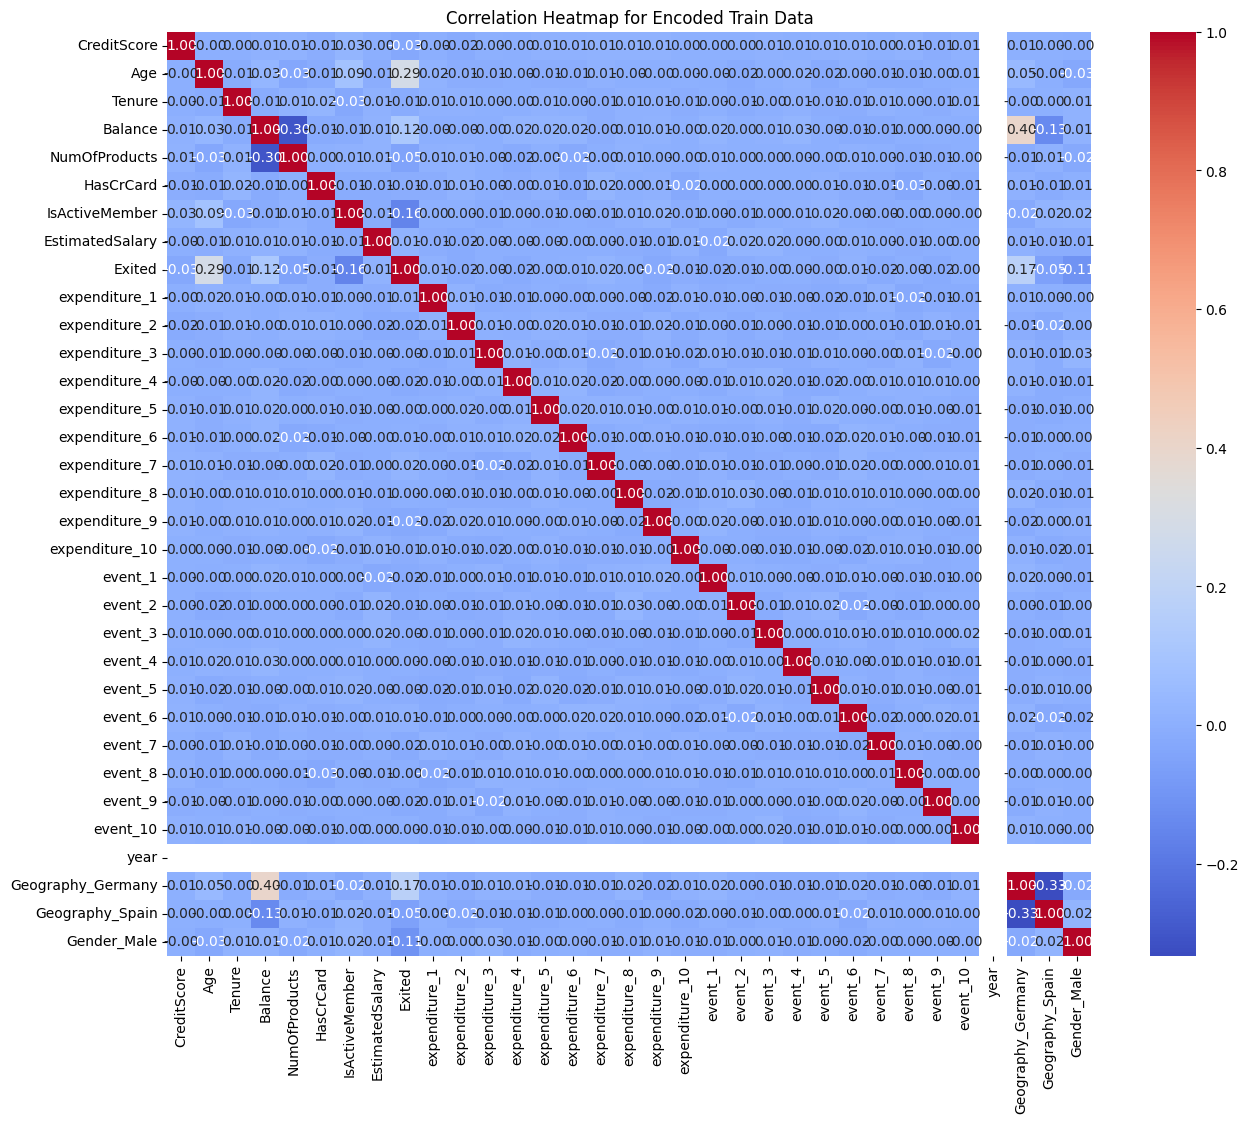

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列を計算
correlation_matrix = train_data_encoded.corr()

# ヒートマップの描画
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap for Encoded Train Data")
plt.show()